# Introduction
 

Checking tumors' response to certain drugs has great applications in practice, including screening for certain genes that are the most predictive ones of drug response. Typically, this analysis will be based on the drug response and gene expression data. Here we take the drug (Doxorubicin_IC_50) as an example to analyze the response of tumor cells and screen some predictive genes.

In data1, the rows represent tumors, while the columns represent the genes (or the explanatory variables). The entries in the matrix represent gene expression level in corresponding tumors. There are 641 tumors and 100 genes in total. In data2, the rows are also the tumors and the first column is the response of the tumors to the drug. The 641 tumors have been divided into two categories according to their response to the drug (Doxorubicin_IC_50). The second column is the class label (0 represents class 1, 1 represents class 2).

## Loading data and libraries

Download the table data1.csv and data2.csv and read the file into the R environment (read.csv function). 

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager", repos='http://cran.us.r-project.org')

BiocManager::install("sva")
library("sva")

In [3]:
library(ggbiplot)
library("matrixStats")
library(lattice)
library("qvalue")
library(devtools)
data1 <- read.csv("data1.csv",header = TRUE)
data1

载入需要的程辑包：ggplot2

载入需要的程辑包：plyr

载入需要的程辑包：scales

载入需要的程辑包：grid


载入程辑包：‘matrixStats’


The following object is masked from ‘package:plyr’:

    count


载入需要的程辑包：usethis



X                                    SCN3A       SCN3B       
1   medulloblastoma                       0.29302989  0.372805163
2   rhabdomyosarcoma (putative Ewing's)  -0.86554124 -1.308590423
3   Ewings sarcoma                        0.16808815  0.748311611
4   Ewings sarcoma                       -0.50541271  0.364326046
5   Ewings sarcoma                       -0.94690444  0.469051778
6   Ewings sarcoma                        0.05820548  1.366023655
7   lung: NSCLC: adenocarcinoma           0.56821532 -0.737715598
8   bladder                              -0.96458017 -0.191470213
9   bladder                              -0.66152283 -1.303318597
10  bladder                              -0.21906905 -1.120460228
11  cervix                                0.66186182 -0.107135833
12  glioma                                0.65869291  0.299246374
13  glioma                                0.49858121 -0.216581789
14  glioma                               -0.51220955 -0.867653658
15  glioma                                1.32585703 -1.427508719
16  glioma                               -0.05398810 -1.376534323
17  glioma                               -0.99098451 -0.959544697
18  lung: NOS                            -0.95356350  0.325211236
19  lung: NSCLC: adenocarcinoma          -0.28011760  0.166288551
20  lung: NSCLC: large cell               0.05144697 -1.085337291
21  lung: NSCLC: squamous_cell_carcinoma  1.15106574 -0.867653658
22  lung: NSCLC: adenocarcinoma          -0.88193256 -0.121276358
23  lung: NSCLC: adenocarcinoma          -0.80617986 -0.160493172
24  lung: NSCLC: adenocarcinoma           0.26349298 -0.340966153
25  lung: NSCLC: NOS                      1.41890168  2.244736324
26  lung: NSCLC: adenocarcinoma           0.82309497  0.061898052
27  lung: NSCLC: adenocarcinoma          -1.15347822 -0.808319608
28  lung: NSCLC: squamous_cell_carcinoma -1.35002745 -0.993168201
29  lung: NSCLC: adenocarcinoma          -0.57250502  1.026490847
30  lung: NSCLC: adenocarcinoma          -1.03939864  0.004439409
⋮   ⋮                                    ⋮           ⋮           
612 glioma                                1.66720762  0.05890605 
613 breast                               -0.50541271  0.32930753 
614 B cell lymphoma                       0.49416178 -0.22763532 
615 glioma                                0.18855092  0.14131991 
616 lymphoblastic leukemia                0.67740769  0.04662428 
617 cervix                               -0.38941154  0.55957437 
618 Ewings sarcoma                       -0.91956635  0.73050589 
619 Ewings sarcoma                       -1.04463347  0.39855966 
620 Ewings sarcoma                       -0.44215119  0.92891687 
621 Ewings sarcoma                       -0.99626575  1.95208307 
622 Ewings sarcoma                        1.10957106  1.69691251 
623 Ewings sarcoma                        0.42671077  0.09331434 
624 Ewings sarcoma                        0.06222997  1.27319675 
625 Ewings sarcoma                       -1.48991653  0.85786394 
626 Ewings sarcoma                        1.64524833  1.72042389 
627 Ewings sarcoma                       -0.35280482  0.71680976 
628 Ewings sarcoma                        0.64253529  1.42690491 
629 neuroblastoma                        -0.07259254  2.82547770 
630 neuroblastoma                         0.26768415  2.44818774 
631 neuroblastoma                         2.12324935 -0.86270072 
632 neuroblastoma                         1.92868172  3.31318151 
633 neuroblastoma                        -0.04224561  0.65672183 
634 neuroblastoma                         1.05831553  2.92500855 
635 neuroblastoma                         2.27548128  0.64542845 
636 neuroblastoma                         0.40538470  2.85024642 
637 neuroblastoma                         2.09860643  2.63509842 
638 neuroblastoma                         1.09100332  3.52078364 
639 rhabdomyosarcoma (putative Ewing's)   1.44921486  1.05195668 
640 rhabdomyosarcoma                     -0.

In [4]:
data2 <-read.csv("data2.csv")
data2

X                                    Doxorubicin_IC_50 target
1   medulloblastoma                       0.63332498       1     
2   rhabdomyosarcoma (putative Ewing's)   0.04872872       1     
3   Ewings sarcoma                       -0.40081145       0     
4   Ewings sarcoma                       -0.82191070       0     
5   Ewings sarcoma                       -0.68379096       0     
6   Ewings sarcoma                        0.28320038       1     
7   lung: NSCLC: adenocarcinoma           2.84364926       1     
8   bladder                              -0.92791313       0     
9   bladder                               2.91452179       1     
10  bladder                               0.93774496       1     
11  cervix                               -0.02694353       0     
12  glioma                               -1.11428542       0     
13  glioma                               -0.45447646       0     
14  glioma                                1.35818553       1     
15  glioma                                0.75251133       1     
16  glioma                                0.28983830       1     
17  glioma                               -1.19807636       0     
18  lung: NOS                            -0.30497014       0     
19  lung: NSCLC: adenocarcinoma          -0.64028707       0     
20  lung: NSCLC: large cell              -0.92638130       0     
21  lung: NSCLC: squamous_cell_carcinoma  0.55449716       1     
22  lung: NSCLC: adenocarcinoma          -0.56686150       0     
23  lung: NSCLC: adenocarcinoma          -0.46683319       0     
24  lung: NSCLC: adenocarcinoma           0.20017536       1     
25  lung: NSCLC: NOS                     -0.19758906       0     
26  lung: NSCLC: adenocarcinoma           0.37023879       1     
27  lung: NSCLC: adenocarcinoma          -0.01039980       0     
28  lung: NSCLC: squamous_cell_carcinoma -0.29572811       0     
29  lung: NSCLC: adenocarcinoma          -1.36734324       0     
30  lung: NSCLC: adenocarcinoma          -1.09641410       0     
⋮   ⋮                                    ⋮                 ⋮     
612 glioma                               -0.88771544       0     
613 breast                               -0.10619005       0     
614 B cell lymphoma                      -0.57038470       0     
615 glioma                               -0.93603181       0     
616 lymphoblastic leukemia                0.23933907       1     
617 cervix                               -0.06661785       0     
618 Ewings sarcoma                       -1.13915208       0     
619 Ewings sarcoma                       -0.18283246       0     
620 Ewings sarcoma                       -1.35830546       0     
621 Ewings sarcoma                       -0.94818431       0     
622 Ewings sarcoma                        0.18153813       1     
623 Ewings sarcoma                       -0.59351529       0     
624 Ewings sarcoma                        0.12567750       1     
625 Ewings sarcoma                       -2.36451158       0     
626 Ewings sarcoma                       -1.53916318       0     
627 Ewings sarcoma                        0.10883123       1     
628 Ewings sarcoma                        0.81635278       1     
629 neuroblastoma                         0.24204529       1     
630 neuroblastoma                        -0.02142895       0     
631 neuroblastoma                         0.17643204       1     
632 neuroblastoma                         1.23079369       1     
633 neuroblastoma                        -0.35834282       0     
634 neuroblastoma                         0.94462338       1     
635 neuroblastoma                         0.30975205       1     
636 neuroblastoma                        -0.19248297       0     
637 neuroblastoma                        -0.60204246       0     
638 neuroblastoma                        -0.74057068       0     
639 rhabdomyosarcoma (putative Ewing's)  -1.72170590       0     
640 rhabdomyosarcoma                      1.

In [5]:
data <- cbind(data1,data2[,2:3])
data
colMeans(as.matrix(data[,2:102]))
apply(as.matrix(data[,2:102]),2,sd)

X                                    SCN3A       SCN3B       
1   medulloblastoma                       0.29302989  0.372805163
2   rhabdomyosarcoma (putative Ewing's)  -0.86554124 -1.308590423
3   Ewings sarcoma                        0.16808815  0.748311611
4   Ewings sarcoma                       -0.50541271  0.364326046
5   Ewings sarcoma                       -0.94690444  0.469051778
6   Ewings sarcoma                        0.05820548  1.366023655
7   lung: NSCLC: adenocarcinoma           0.56821532 -0.737715598
8   bladder                              -0.96458017 -0.191470213
9   bladder                              -0.66152283 -1.303318597
10  bladder                              -0.21906905 -1.120460228
11  cervix                                0.66186182 -0.107135833
12  glioma                                0.65869291  0.299246374
13  glioma                                0.49858121 -0.216581789
14  glioma                               -0.51220955 -0.867653658
15  glioma                                1.32585703 -1.427508719
16  glioma                               -0.05398810 -1.376534323
17  glioma                               -0.99098451 -0.959544697
18  lung: NOS                            -0.95356350  0.325211236
19  lung: NSCLC: adenocarcinoma          -0.28011760  0.166288551
20  lung: NSCLC: large cell               0.05144697 -1.085337291
21  lung: NSCLC: squamous_cell_carcinoma  1.15106574 -0.867653658
22  lung: NSCLC: adenocarcinoma          -0.88193256 -0.121276358
23  lung: NSCLC: adenocarcinoma          -0.80617986 -0.160493172
24  lung: NSCLC: adenocarcinoma           0.26349298 -0.340966153
25  lung: NSCLC: NOS                      1.41890168  2.244736324
26  lung: NSCLC: adenocarcinoma           0.82309497  0.061898052
27  lung: NSCLC: adenocarcinoma          -1.15347822 -0.808319608
28  lung: NSCLC: squamous_cell_carcinoma -1.35002745 -0.993168201
29  lung: NSCLC: adenocarcinoma          -0.57250502  1.026490847
30  lung: NSCLC: adenocarcinoma          -1.03939864  0.004439409
⋮   ⋮                                    ⋮           ⋮           
612 glioma                                1.66720762  0.05890605 
613 breast                               -0.50541271  0.32930753 
614 B cell lymphoma                       0.49416178 -0.22763532 
615 glioma                                0.18855092  0.14131991 
616 lymphoblastic leukemia                0.67740769  0.04662428 
617 cervix                               -0.38941154  0.55957437 
618 Ewings sarcoma                       -0.91956635  0.73050589 
619 Ewings sarcoma                       -1.04463347  0.39855966 
620 Ewings sarcoma                       -0.44215119  0.92891687 
621 Ewings sarcoma                       -0.99626575  1.95208307 
622 Ewings sarcoma                        1.10957106  1.69691251 
623 Ewings sarcoma                        0.42671077  0.09331434 
624 Ewings sarcoma                        0.06222997  1.27319675 
625 Ewings sarcoma                       -1.48991653  0.85786394 
626 Ewings sarcoma                        1.64524833  1.72042389 
627 Ewings sarcoma                       -0.35280482  0.71680976 
628 Ewings sarcoma                        0.64253529  1.42690491 
629 neuroblastoma                        -0.07259254  2.82547770 
630 neuroblastoma                         0.26768415  2.44818774 
631 neuroblastoma                         2.12324935 -0.86270072 
632 neuroblastoma                         1.92868172  3.31318151 
633 neuroblastoma                        -0.04224561  0.65672183 
634 neuroblastoma                         1.05831553  2.92500855 
635 neuroblastoma                         2.27548128  0.64542845 
636 neuroblastoma                         0.40538470  2.85024642 
637 neuroblastoma                         2.09860643  2.63509842 
638 neuroblastoma                         1.09100332  3.52078364 
639 rhabdomyosarcoma (putative Ewing's)   1.44921486  1.05195668 
640 rhabdomyosarcoma                     -0.

SCN3A                SCN3B TMPRSS11E.....LOC653 
        1.172835e-15         8.765739e-16        -3.174788e-16 
               RPLP2                 GFER               RBM35A 
       -3.889245e-14         6.005943e-15        -5.732977e-17 
              RBM35B                BTBD1                BTBD2 
       -9.768577e-17        -6.985658e-15         1.394707e-15 
               RPLP0                RPLP1                BTBD3 
        2.060945e-14         2.351265e-14        -1.400856e-15 
            FLJ10081                ACAA2               TMEFF1 
        1.076622e-15         2.812103e-15        -1.074457e-15 
               SCN2B                 TFPT                 UGCG 
        1.024921e-15         5.560814e-15        -1.552753e-16 
               BTBD7                BTBD5                 JTV1 
        4.927589e-15        -2.651718e-15         3.245800e-16 
                 GEM                BTBD9    FAM45B.....FAM45A 
       -6.408464e-17        -1.248611e-15         7.767231e-16 
               TAGLN              HSD11B1                 TFPI 
        7.760303e-16        -1.692181e-16         2.723164e-16 
             HSD11B2                ACAA1                SCN1A 
       -8.997829e-17        -1.000760e-15        -2.715803e-16 
             RALGPS2                SCN1B              RALGPS1 
        2.067693e-15        -7.755973e-16         1.343439e-15 
  RBM4.....LOC650029      TRPV1.....CARKL                    T 
        1.622207e-15         1.783978e-16         3.817366e-16 
                ATN1                 FAIM  DDX11.....DDX12.... 
       -3.120943e-15         1.674514e-15        -1.516901e-15 
                 GGH                ACACA               ZSCAN5 
        5.340155e-15         7.439880e-16         1.447620e-15 
               ACACB               ZSCAN2                  GH2 
       -2.143544e-15        -6.581665e-17         5.792732e-16 
               GNGT1                  GH1                GNGT2 
       -4.875628e-16        -8.378633e-16         5.975459e-17 
               PARP8                 POP1                PARP6 
        4.137789e-15         1.834206e-15        -1.110743e-15 
               PARP3                PARP4                 POP4 
       -6.588593e-16        -5.982387e-16        -1.332094e-14 
                POP5                PARP1                PARP2 
        2.597333e-15         7.393981e-16         5.680497e-15 
              ACAD10                 POP7                BCKDK 
        1.097233e-15        -7.782300e-15         8.627351e-15 
                GFAP     NBPF1.....NBPF10                MGRN1 
       -1.652344e-16        -1.903314e-15         2.709221e-15 
              ANP32A                  GHR                  GIP 
       -1.371758e-15         1.340581e-16        -1.693913e-15 
               MTERF               ANP32B               ANP32C 
        2.086020e-15         1.676800e-14        -7.863358e-17 
              ANP32E             FLJ10038               SLC3A2 
        5.610697e-15        -3.753628e-15        -4.653757e-15 
                 GIF               SLC3A1                CCT6A 
        1.815327e-15        -1.567129e-15        -1.815587e-15 
               BRWD1                BRWD2                PARVB 
        3.927912e-15        -9.429794e-15        -3.846983e-15 
               PARVA                PTOV1                 MDS1 
       -3.541802e-15        -2.226421e-15        -4.638342e-16 
                FALZ                ECEL1                  GK2 
        2.668865e-14         1.933624e-15        -8.457440e-16 
               SCML2                SCML1                 UGDH 
        6.848158e-15        -7.087414e-16         7.958273e-15 
KRTAP2.4.....LOC6443                PART1                 POT1 
        1.842520e-15         2.286349e-15         2.439135e-15 
               CCT6B                DOM3Z                DHCR7 
        1.293817e-15         1.944363e-15        -1.830504e-15 
                ATRN              C20ORF6      

SCN3A                SCN3B TMPRSS11E.....LOC653 
                   1                    1                    1 
               RPLP2                 GFER               RBM35A 
                   1                    1                    1 
              RBM35B                BTBD1                BTBD2 
                   1                    1                    1 
               RPLP0                RPLP1                BTBD3 
                   1                    1                    1 
            FLJ10081                ACAA2               TMEFF1 
                   1                    1                    1 
               SCN2B                 TFPT                 UGCG 
                   1                    1                    1 
               BTBD7                BTBD5                 JTV1 
                   1                    1                    1 
                 GEM                BTBD9    FAM45B.....FAM45A 
                   1                    1                    1 
               TAGLN              HSD11B1                 TFPI 
                   1                    1                    1 
             HSD11B2                ACAA1                SCN1A 
                   1                    1                    1 
             RALGPS2                SCN1B              RALGPS1 
                   1                    1                    1 
  RBM4.....LOC650029      TRPV1.....CARKL                    T 
                   1                    1                    1 
                ATN1                 FAIM  DDX11.....DDX12.... 
                   1                    1                    1 
                 GGH                ACACA               ZSCAN5 
                   1                    1                    1 
               ACACB               ZSCAN2                  GH2 
                   1                    1                    1 
               GNGT1                  GH1                GNGT2 
                   1                    1                    1 
               PARP8                 POP1                PARP6 
                   1                    1                    1 
               PARP3                PARP4                 POP4 
                   1                    1                    1 
                POP5                PARP1                PARP2 
                   1                    1                    1 
              ACAD10                 POP7                BCKDK 
                   1                    1                    1 
                GFAP     NBPF1.....NBPF10                MGRN1 
                   1                    1                    1 
              ANP32A                  GHR                  GIP 
                   1                    1                    1 
               MTERF               ANP32B               ANP32C 
                   1                    1                    1 
              ANP32E             FLJ10038               SLC3A2 
                   1                    1                    1 
                 GIF               SLC3A1                CCT6A 
                   1                    1                    1 
               BRWD1                BRWD2                PARVB 
                   1                    1                    1 
               PARVA                PTOV1                 MDS1 
                   1                    1                    1 
                FALZ                ECEL1                  GK2 
                   1                    1                    1 
               SCML2                SCML1                 UGDH 
                   1                    1                    1 
KRTAP2.4.....LOC6443                PART1                 POT1 
                   1                    1                    1 
               CCT6B                DOM3Z                DHCR7 
                   1                    1                    1 
                ATRN              C20ORF6      

## PCA

•	Carry out a PCA analysis of the data table. Plot the loadings to verify whether the genes can be separated and use colors for better distinction of the target. 

In [39]:
data.pca <- prcomp(data[,2:101], center = TRUE,scale. = TRUE)
summary(data.pca)
ggbiplot(data.pca,var.scale = 1, ellipse = TRUE, circle = TRUE,groups=factor(data[,103]))
data.pca$rotation

plot(data.pca$rotation,col=rep(1:4,each=25),pch=16)
text(data.pca$rotation,colnames(data),pos=2)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.2072 2.55075 2.19277 2.03025 1.70377 1.58468 1.46201
Proportion of Variance 0.1029 0.06506 0.04808 0.04122 0.02903 0.02511 0.02137
Cumulative Proportion  0.1029 0.16792 0.21600 0.25722 0.28625 0.31136 0.33274
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.45159 1.40619 1.34839 1.30251 1.26666 1.24833 1.23147
Proportion of Variance 0.02107 0.01977 0.01818 0.01697 0.01604 0.01558 0.01517
Cumulative Proportion  0.35381 0.37358 0.39177 0.40873 0.42478 0.44036 0.45552
                          PC15    PC16    PC17   PC18    PC19    PC20    PC21
Standard deviation     1.19337 1.15991 1.15715 1.1487 1.12041 1.10802 1.10138
Proportion of Variance 0.01424 0.01345 0.01339 0.0132 0.01255 0.01228 0.01213
Cumulative Proportion  0.46977 0.48322 0.49661 0.5098 0.52236 0.53463 0.54676
                          PC22    

PC1           PC2           PC3          PC4          
SCN3A                -0.0957814544  0.0824611725  0.150244077  0.0927958289
SCN3B                -0.0736109483  0.0844010928  0.240100190  0.0599536358
TMPRSS11E.....LOC653  0.0096443279  0.0347042879  0.042380580 -0.1787063087
RPLP2                -0.2031191488  0.0384619517 -0.165446443 -0.0264302895
GFER                 -0.0971234152 -0.2042819661 -0.093753701 -0.0514708515
RBM35A                0.0548239365  0.0058784725  0.121158049 -0.3730787176
RBM35B                0.0318622547 -0.0773610115  0.110907103 -0.3783483442
BTBD1                 0.0113244876  0.1072720491 -0.088882211  0.1213674886
BTBD2                -0.1258279331 -0.1784638288 -0.001367617  0.0929479050
RPLP0                -0.2241916897  0.0231439330 -0.123909319 -0.0559934112
RPLP1                -0.2315259131 -0.0001293392 -0.153811562 -0.0335443584
BTBD3                 0.0912329715 -0.0486055830  0.237952100  0.0289303477
FLJ10081             -0.0820725869  0.0296432985  0.009998094 -0.0056193805
ACAA2                -0.0392342440  0.0918312579  0.058821637  0.1832652584
TMEFF1                0.0309910833  0.1349446467  0.238828971  0.2127585694
SCN2B                -0.1053611014 -0.0148049152 -0.018203318 -0.0227616340
TFPT                 -0.0649089499 -0.0881866038 -0.032881558  0.1201552260
UGCG                  0.1426715314 -0.1086911956 -0.015827089  0.0294522572
BTBD7                -0.1375949364  0.0367555175 -0.024149268 -0.1030717996
BTBD5                -0.1756430456  0.0249866081  0.072202068 -0.0694074956
JTV1                  0.0008319521  0.0232530526  0.075990053 -0.0526221835
GEM                   0.1048553306 -0.0331908700  0.055934738  0.1679040288
BTBD9                -0.0560441428 -0.0204802470  0.061386208  0.0409878287
FAM45B.....FAM45A     0.0528972409 -0.0941223292 -0.078630261 -0.0003999868
TAGLN                 0.0310074468 -0.1342215265  0.033428513  0.0770898416
HSD11B1               0.0141264069  0.0505610964 -0.073374751  0.0676424946
TFPI                  0.1132087673 -0.1111880679 -0.047083223  0.0952155845
HSD11B2              -0.0734024079 -0.0344971319  0.204245496 -0.1784268088
ACAA1                -0.0612151924 -0.1354625366 -0.171992670 -0.0964956767
SCN1A                -0.0534750513  0.0350857999  0.095342352  0.0645662330
⋮                    ⋮             ⋮             ⋮            ⋮            
FLJ10038             -0.179025743   0.077458254   0.010134073  0.0776854274
SLC3A2                0.036584411  -0.080563755  -0.002999581 -0.2016469230
GIF                  -0.083260106  -0.031845337   0.003375441 -0.0417088845
SLC3A1                0.029336215   0.056311965   0.011091896 -0.0509045120
CCT6A                 0.027081424   0.126431832   0.087809598 -0.0006011839
BRWD1                -0.022813061   0.201124361   0.029476918 -0.0795799445
BRWD2                 0.069024579   0.110564461  -0.123918901  0.0013503795
PARVB                -0.023443299  -0.097084554  -0.162413359  0.1204015895
PARVA                 0.189188229  -0.138551020   0.098538129  0.0584949738
PTOV1                -0.150675559  -0.176292919   0.123056141  0.1072008810
MDS1                 -0.067427304  -0.052319386   0.004732516 -0.1386692786
FALZ                 -0.176812647   0.097255805   0.014229989  0.0023376914
ECEL1                -0.078253098   0.001529940   0.100350133 -0.0240049515
GK2                  -0.104666295  -0.016337031  -0.029792910 -0.0423417809
SCML2                -0.052030422   0.067883267   0.196779507  0.0865284358
SCML1                 0.149860166  -0.044585736   0.204886877  0.0198546950
UGDH                  0.110139417  -0.115001087   0.029876526 -0.0585816678
KRTAP2.4.....LOC6443 -0.025341683   0.021327406  -0.071310755  0.0052311025
PART1                -0.071417971  -0.025663920   0.053719466 -0.0740674662
POT1                  0.002845652   0.158881366   0.005149127  0.1020684455
CCT6B                 0.061734015   0.041533526  -0.057112716 -0.0791

## correlations

Calculate Pearson’s correlations (cor function) between all gene and plot all of them at once with the levelplot function (library lattice). 

In [41]:
corr <- cor(data[,2:102],method = "pearson")
levelplot(cor(data[,2:102],method = "pearson"),main="gene correlations")
top10 <- corr[order(corr[,101]), ][1:10,]
top10
gene <- row.names(top10)
gene

SCN3A         SCN3B       TMPRSS11E.....LOC653 RPLP2       
BRWD2              -0.1248651524 -0.06719222  0.019931001          0.009600606
ANP32B              0.1025647795  0.08891378 -0.005776667          0.520715431
PARP8              -0.0001493624 -0.13560108  0.050867434          0.153394407
NBPF1.....NBPF10   -0.1511574889 -0.05336915  0.052541713         -0.125082305
BTBD1              -0.0038023797  0.04032340 -0.121207812          0.013623289
RBM4.....LOC650029  0.1499092001  0.19233941  0.084724651          0.130077559
FAM45B.....FAM45A  -0.2346983766 -0.16274760 -0.051501149         -0.071525633
CCT6A               0.0683936271  0.12247825  0.008287371         -0.007523568
ATRN               -0.0570941741  0.05412842  0.029295181         -0.345525035
POP5               -0.0236372290 -0.09033077  0.079478276         -0.181638714
                   GFER        RBM35A      RBM35B      BTBD1       BTBD2     
BRWD2              -0.15430949 -0.03284189 -0.11993584  0.18080802 -0.1685592
ANP32B              0.19246256 -0.11801179 -0.05304690 -0.02677971  0.2242321
PARP8              -0.01733731  0.05097072 -0.03867840  0.05064593 -0.1842343
NBPF1.....NBPF10   -0.39550604  0.03822854 -0.11154689  0.16912852 -0.4410219
BTBD1              -0.18065016 -0.21091189 -0.27305006  1.00000000 -0.0246229
RBM4.....LOC650029  0.19574516  0.07342579  0.13555647 -0.14582595  0.2388474
FAM45B.....FAM45A   0.02005940 -0.06000703  0.01448607 -0.07732870  0.1376992
CCT6A              -0.09941293  0.08401885  0.03584616 -0.01014700 -0.1387983
ATRN               -0.23192421  0.07994583  0.02340158 -0.04148859 -0.1746493
POP5               -0.07898478  0.11081135  0.07348897  0.11204280 -0.2915856
                   RPLP0        ⋯ DOM3Z       DHCR7       ATRN       
BRWD2              -0.043501854 ⋯ -0.16723581 -0.19102428  0.15087118
ANP32B              0.548610672 ⋯  0.12838668  0.05035468 -0.40663386
PARP8               0.050663280 ⋯ -0.17386273 -0.08205067 -0.03490467
NBPF1.....NBPF10   -0.211321533 ⋯ -0.31621365 -0.22478519  0.32301786
BTBD1               0.007722671 ⋯ -0.08744079 -0.18240615 -0.04148859
RBM4.....LOC650029  0.202835465 ⋯  0.30028837  0.14990806 -0.14640366
FAM45B.....FAM45A  -0.064616621 ⋯  0.01690943  0.01200099  0.13447224
CCT6A              -0.051984597 ⋯ -0.11799763 -0.09041470  0.08339565
ATRN               -0.373529473 ⋯ -0.14623877 -0.09249788  1.00000000
POP5               -0.143462304 ⋯ -0.15344888 -0.07704578  0.13779634
                   C20ORF6      C20ORF4      C20ORF3     MANBA      
BRWD2               0.030197854 -0.020763082 -0.09874152  0.11497975
ANP32B              0.171246406 -0.056174112 -0.30199796 -0.08075249
PARP8              -0.049091456 -0.100484582 -0.19566321  0.16846742
NBPF1.....NBPF10    0.059762330 -0.223642521 -0.10748809  0.12408689
BTBD1               0.005939601 -0.069504826 -0.08511133  0.09649592
RBM4.....LOC650029  0.063116766  0.336671595 -0.01464053 -0.22869382
FAM45B.....FAM45A   0.029204342 -0.001822393  0.03432355  0.10408381
CCT6A               0.207373930 -0.121840426 -0.09386076 -0.13693117
ATRN                0.153929978  0.095642512  0.37091358  0.07010703
POP5               -0.146493277 -0.036723723 -0.05370078  0.10855229
                   ATRX        GLA         Doxorubicin_IC_50
BRWD2               0.08850382  0.01073764 -0.12521619      
ANP32B              0.10716787 -0.25928262 -0.11061699      
PARP8               0.09859125  0.03056587 -0.10800832      
NBPF1.....NBPF10    0.25242156  0.13662930 -0.10412296      
BTBD1               0.04112386 -0.02237793 -0.10373403      
RBM4.....LOC650029 -0.08164201 -0.24345926 -0.09584288      
FAM45B.....FAM45A  -0.17175327  0.13139003 -0.09385714      
CCT6A               0.13714557  0.01853570 -0.08090725      
ATRN               -0.04727117  0.10397428 -0.07934884      
POP5                0.04823024  0.12893978 -0.07652303

[1] "BRWD2"              "ANP32B"             "PARP8"             
 [4] "NBPF1.....NBPF10"   "BTBD1"              "RBM4.....LOC650029"
 [7] "FAM45B.....FAM45A"  "CCT6A"              "ATRN"              
[10] "POP5"

## linear regression

In [9]:
datax <- data[,2:101]
y<-data[,102]
lm.data=lm(y~.,data=datax)
summ <- summary(lm.data)
summ
coef(summ)


Call:
lm(formula = y ~ ., data = datax)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2601 -0.6063 -0.0454  0.5236  3.3524 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.232e-14  3.767e-02   0.000 1.000000    
SCN3A                 8.101e-03  5.032e-02   0.161 0.872161    
SCN3B                 3.386e-02  5.010e-02   0.676 0.499497    
TMPRSS11E.....LOC653 -5.791e-02  4.557e-02  -1.271 0.204317    
RPLP2                 1.717e-01  7.835e-02   2.191 0.028859 *  
GFER                  4.600e-03  5.792e-02   0.079 0.936727    
RBM35A                1.453e-02  6.973e-02   0.208 0.835074    
RBM35B                2.110e-02  6.853e-02   0.308 0.758267    
BTBD1                -1.150e-01  4.773e-02  -2.410 0.016291 *  
BTBD2                 3.992e-02  5.528e-02   0.722 0.470559    
RPLP0                -2.251e-02  1.147e-01  -0.196 0.844492    
RPLP1                -9.612e-02  1.205e-01  -0.797 0.425565    
BTBD3             

Estimate      Std. Error t value       Pr(>|t|)  
(Intercept)           1.232391e-14 0.03766725  3.271783e-13 1.00000000
SCN3A                 8.101189e-03 0.05032069  1.609912e-01 0.87216053
SCN3B                 3.385774e-02 0.05010488  6.757374e-01 0.49949668
TMPRSS11E.....LOC653 -5.791056e-02 0.04556718 -1.270883e+00 0.20431743
RPLP2                 1.716912e-01 0.07835273  2.191260e+00 0.02885944
GFER                  4.600127e-03 0.05792098  7.942075e-02 0.93672739
RBM35A                1.452524e-02 0.06973270  2.082989e-01 0.83507416
RBM35B                2.110126e-02 0.06852979  3.079136e-01 0.75826678
BTBD1                -1.150123e-01 0.04772544 -2.409875e+00 0.01629139
BTBD2                 3.991803e-02 0.05528216  7.220779e-01 0.47055915
RPLP0                -2.250665e-02 0.11468595 -1.962459e-01 0.84449152
RPLP1                -9.612124e-02 0.12054215 -7.974077e-01 0.42556476
BTBD3                -3.450691e-02 0.05349986 -6.449906e-01 0.51920720
FLJ10081             -3.134442e-02 0.04393539 -7.134209e-01 0.47589357
ACAA2                -1.162065e-02 0.04895896 -2.373550e-01 0.81247143
TMEFF1                8.223983e-02 0.05919313  1.389347e+00 0.16529972
SCN2B                -1.289853e-02 0.04360908 -2.957763e-01 0.76751459
TFPT                  5.509344e-02 0.04901194  1.124082e+00 0.26147772
UGCG                  6.526309e-03 0.05422786  1.203497e-01 0.90425086
BTBD7                 5.067213e-02 0.04780289  1.060022e+00 0.28960832
BTBD5                -7.350488e-02 0.05074277 -1.448578e+00 0.14803576
JTV1                  8.673507e-04 0.04953227  1.751082e-02 0.98603557
GEM                   2.229320e-02 0.05068062  4.398762e-01 0.66020274
BTBD9                -2.366975e-02 0.04442457 -5.328076e-01 0.59438599
FAM45B.....FAM45A    -8.370802e-02 0.04955719 -1.689119e+00 0.09177379
TAGLN                -4.126304e-02 0.04597532 -8.975043e-01 0.36984987
HSD11B1               4.708209e-02 0.04271993  1.102111e+00 0.27090450
TFPI                 -1.864033e-02 0.05526343 -3.372996e-01 0.73602214
HSD11B2               9.432757e-02 0.05245944  1.798105e+00 0.07271886
ACAA1                 8.486971e-02 0.05323755  1.594170e+00 0.11148304
⋮                    ⋮             ⋮          ⋮             ⋮         
FLJ10038              0.007517178  0.05711052  0.1316251    0.89532986
SLC3A2               -0.010657148  0.05291934 -0.2013847    0.84047358
GIF                   0.016844197  0.04343298  0.3878204    0.69830179
SLC3A1                0.037845696  0.04551480  0.8315031    0.40605699
CCT6A                -0.104582294  0.05013886 -2.0858530    0.03746074
BRWD1                -0.042358467  0.05080099 -0.8338119    0.40475567
BRWD2                -0.018496796  0.04765027 -0.3881782    0.69803713
PARVB                -0.031189709  0.05292764 -0.5892897    0.55591342
PARVA                -0.127642957  0.06713069 -1.9014099    0.05778035
PTOV1                 0.052518945  0.06489014  0.8093517    0.41866932
MDS1                 -0.029586299  0.04453779 -0.6642966    0.50678406
FALZ                  0.025669340  0.06210725  0.4133067    0.67954602
ECEL1                 0.035476157  0.04331937  0.8189444    0.41317942
GK2                   0.070833910  0.04394523  1.6118679    0.10757496
SCML2                 0.051733035  0.04965054  1.0419429    0.29790438
SCML1                 0.082453920  0.05807176  1.4198627    0.15622470
UGDH                  0.048268449  0.04920955  0.9808756    0.32709333
KRTAP2.4.....LOC6443 -0.048296403  0.04435524 -1.0888546    0.27670373
PART1                -0.041977227  0.04347072 -0.9656438    0.33465472
POT1                  0.019117254  0.05132161  0.3724991    0.70966744
CCT6B                -0.007793198  0.04738380 -0.1644697    0.86942296
DOM3Z                 0.009395345  0.05523348  0.1701024    0.86499333
DHCR7                 0.008026844  0.04817818  0.1666075    0.86774129
ATRN                 -0.106980650  0.05589060 -1.9141080    0.05613461
C20ORF6              -0.028594943  0.05272190


载入程辑包：‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers





                                 Selection Summary                                   
------------------------------------------------------------------------------------
        Variable                            Adj.                                        
Step         Entered          R-Square    R-Square     C(p)         AIC        RMSE     
------------------------------------------------------------------------------------
   1    HSD11B2                 0.0277      0.0262    47.2229    1806.0768    0.9868    
   2    RBM4.....LOC650029      0.0443      0.0413    37.5197    1797.0181    0.9791    
   3    MGRN1                   0.0664      0.0620    24.0116    1784.0637    0.9685    
   4    ANP32B                  0.0784      0.0727    17.5066    1777.7119    0.9630    
   5    BTBD1                   0.0887      0.0815    12.2851    1772.5339    0.9584    
   6    FAM45B.....FAM45A       0.1004      0.0919     6.0337    1766.2327    0.9529    
   7    SCN1A                  

[[1]]
NULL

[[2]]
NULL


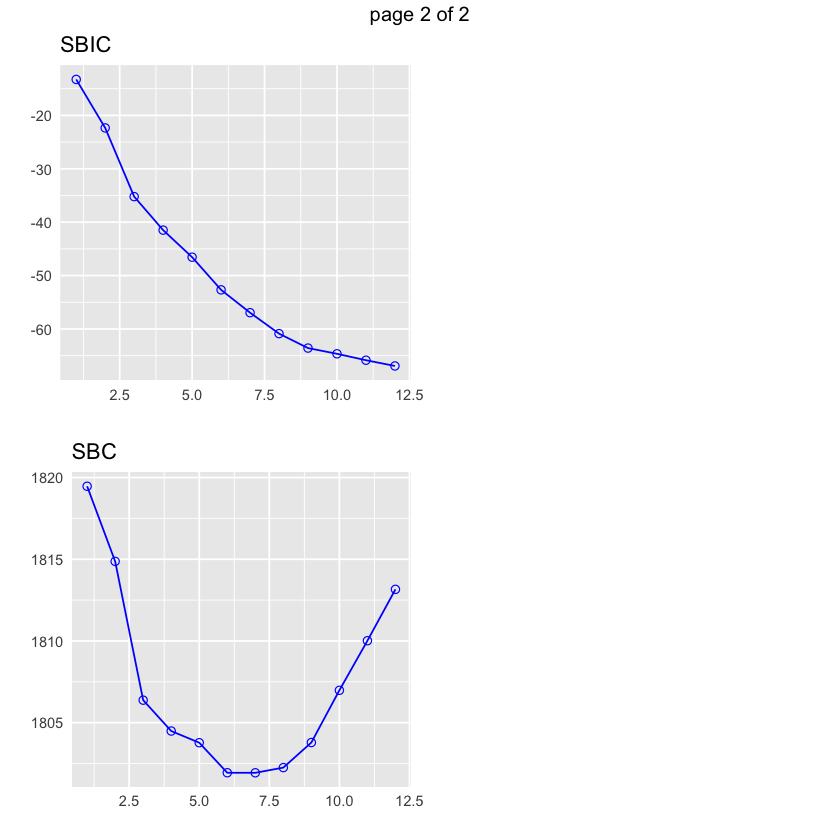

In [10]:
library(olsrr)
stp <- ols_step_forward_p(lm.data,0.08)
stp
plot(stp)

In [11]:
top_10<-stp$predictors[1:10]
top_10

[1] "HSD11B2"            "RBM4.....LOC650029" "MGRN1"             
 [4] "ANP32B"             "BTBD1"              "FAM45B.....FAM45A" 
 [7] "SCN1A"              "ATRN"               "GNGT1"             
[10] "PTOV1"

In [29]:
ols_step_forward_aic(lm.data)
ols_step_forward_aic(lm.data)$predictors[1:10]


                             Selection Summary                               
----------------------------------------------------------------------------
Variable                AIC       Sum Sq       RSS       R-Sq      Adj. R-Sq 
----------------------------------------------------------------------------
HSD11B2               1806.077     17.723    622.277    0.02769      0.02617 
RBM4.....LOC650029    1797.018     28.367    611.633    0.04432      0.04133 
MGRN1                 1784.064     42.471    597.529    0.06636      0.06196 
ANP32B                1777.712     50.206    589.794    0.07845      0.07265 
BTBD1                 1772.534     56.774    583.226    0.08871      0.08153 
FAM45B.....FAM45A     1766.233     64.278    575.722    0.10043      0.09192 
SCN1A                 1761.767     70.057    569.943    0.10946      0.09962 
ATRN                  1757.622     75.494    564.506    0.11796      0.10679 
GNGT1                 1754.694     79.818    560.182    0.12472  

[1] "HSD11B2"            "RBM4.....LOC650029" "MGRN1"             
 [4] "ANP32B"             "BTBD1"              "FAM45B.....FAM45A" 
 [7] "SCN1A"              "ATRN"               "GNGT1"             
[10] "PTOV1"

In [30]:
?ols_step_forward_aic

In [13]:
ols_step_both_aic(lm.data)



                                      Stepwise Summary                                      
------------------------------------------------------------------------------------------
Variable                 Method       AIC         RSS      Sum Sq      R-Sq      Adj. R-Sq 
------------------------------------------------------------------------------------------
HSD11B2                 addition    1806.077    622.277     17.723    0.02769      0.02617 
RBM4.....LOC650029      addition    1797.018    611.633     28.367    0.04432      0.04133 
MGRN1                   addition    1784.064    597.529     42.471    0.06636      0.06196 
ANP32B                  addition    1777.712    589.794     50.206    0.07845      0.07265 
BTBD1                   addition    1772.534    583.226     56.774    0.08871      0.08153 
FAM45B.....FAM45A       addition    1766.233    575.722     64.278    0.10043      0.09192 
SCN1A                   addition    1761.767    569.943     70.057    0.10946  

# Lasso

## library(lars)

### Fit the Lasso Regression Model


Call:
lars(x = x, y = y, type = "lar")
R-squared: 0.233 
Sequence of LAR moves:
     HSD11B2 PTOV1 ANP32B BRWD2 MGRN1 RBM4.....LOC650029 SCN1A BTBD1
Var       28    80     68    77    63                 34    30     8
Step       1     2      3     4     5                  6     7     8
     FAM45B.....FAM45A RALGPS1 GNGT1 POP7 ATRN CCT6A NBPF1.....NBPF10 ACAA1
Var                 24      33    46   59   94    75               62    29
Step                 9      10    11   12   13    14               15    16
     PARP8 GK2 SCML1 UGDH SCN1B SCML2 TFPT ACACA BTBD7 PARVA GFAP GH1
Var     49  84    86   87    32    85   17    41    19    79   61  47
Step    17  18    19   20    21    22   23    24    25    26   27  28
     TMPRSS11E.....LOC653  T HSD11B1 KRTAP2.4.....LOC6443 RPLP2 ANP32E PARP1
Var                     3 36      26                   88     4     70    56
Step                   29 30      31                   32    33     34    35
     ACACB GNGT2 SCN3A POP5 ANP32C POP1 SLC

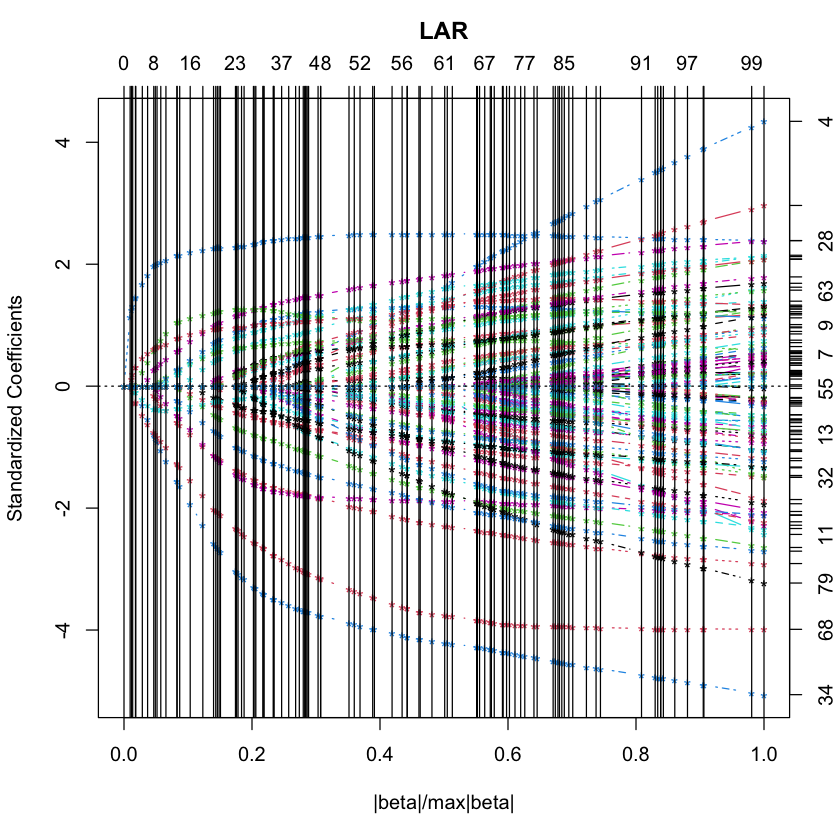

In [46]:
set.seed(3)
library(lars)
x <- as.matrix(data[,2:101])
lar<-lars(x,y,type="lar")
plot(lar)
# the picture tell us that which variable we will choose.
lar

### Choose an Optimal Value for Step

In [15]:
lar$Cp[which.min(lar$Cp)]

23 
24.5726

In [16]:
coef <- coef.lars(lar,mode="step",s=24)
coef[coef!=0]

BTBD1               TFPT  FAM45B.....FAM45A            HSD11B2 
      -0.054151369        0.005670058       -0.057104514        0.090423888 
             ACAA1              SCN1A              SCN1B            RALGPS1 
       0.023066887        0.045767350       -0.010622907        0.025060093 
RBM4.....LOC650029              GNGT1              PARP8               POP7 
      -0.119803271        0.035297859       -0.011805052        0.031367169 
  NBPF1.....NBPF10              MGRN1             ANP32B              CCT6A 
      -0.016748812        0.049778333       -0.091737433       -0.026747828 
             BRWD2              PTOV1                GK2              SCML2 
      -0.008243439        0.038029526        0.009679848        0.007848668 
             SCML1               UGDH               ATRN 
       0.006192617        0.006635380       -0.039136793

[1] 23

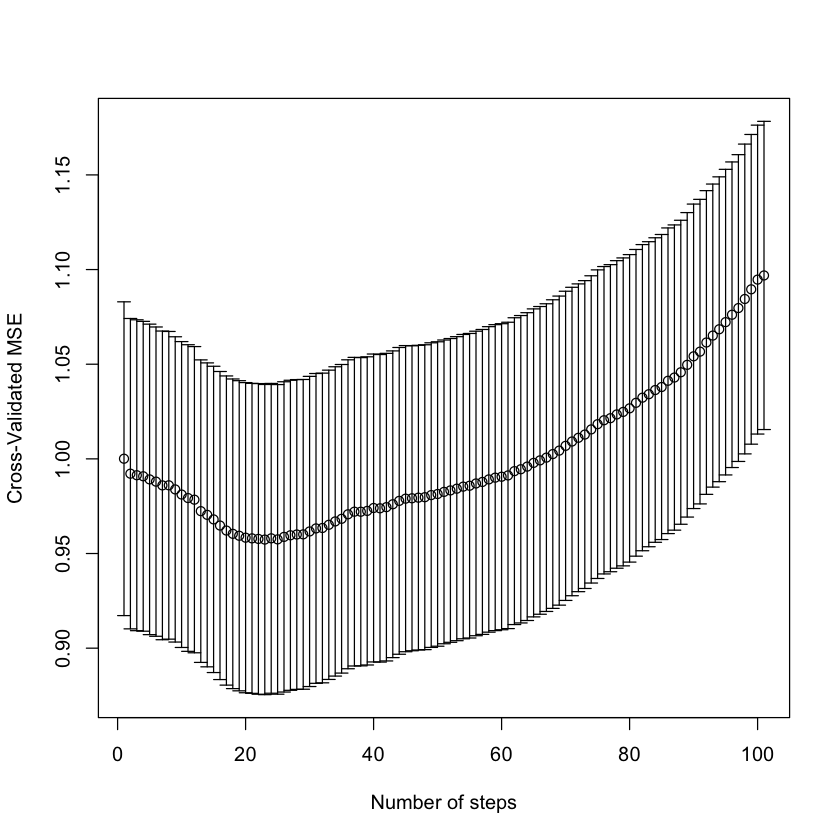

In [18]:
lasol1<-cv.lars(x,y,type="lar",mode="step")
lasol1$index[which.min(lasol1$cv)]

### library(glmnet)

### Fit the Lasso Regression Model

载入需要的程辑包：Matrix

Loaded glmnet 4.1-4



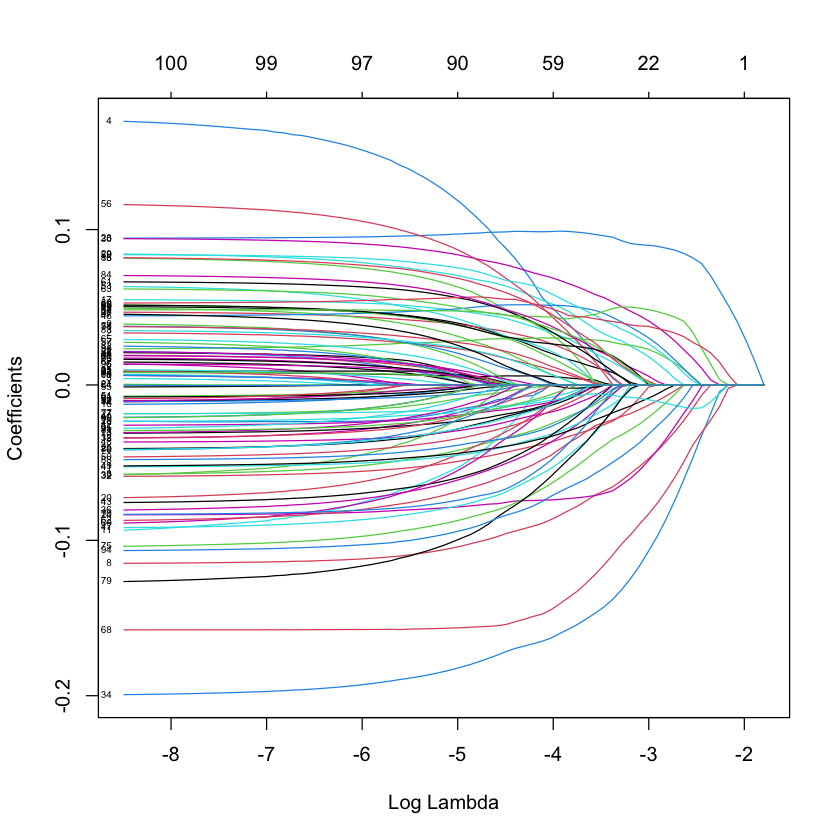

In [19]:
library(glmnet)
lar2 <- glmnet(x, y, alpha=1)
plot(lar2, xvar="lambda", label=TRUE)

### Choose an Optimal Value for Lambda

[1] 0.04961271

[1] 0.1662821

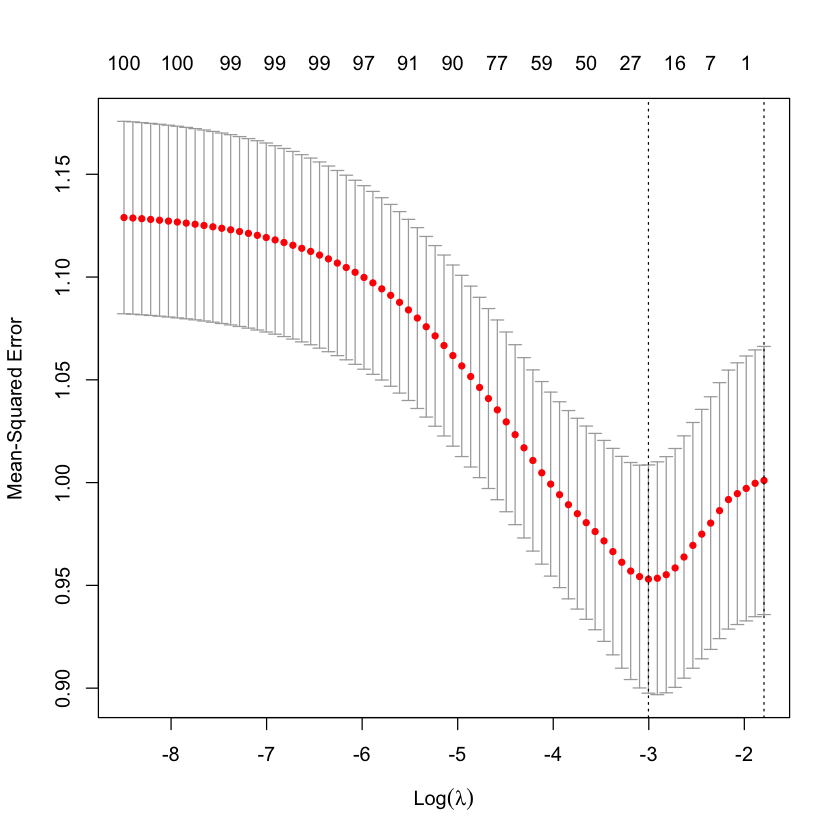

In [20]:
set.seed(3)
cvfit=cv.glmnet(x,y)
plot(cvfit)
cvfit$lambda.min
cvfit$lambda.1se

In [21]:
lasol2<-glmnet(x, y, alpha = 1, lambda=cvfit$lambda.min)
lasol3<-glmnet(x, y, alpha = 1, lambda=cvfit$lambda.1se)
coef(lasol2)
coef(lasol3)

101 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)           2.789252e-15
SCN3A                 .           
SCN3B                 .           
TMPRSS11E.....LOC653  .           
RPLP2                 .           
GFER                  .           
RBM35A                .           
RBM35B                .           
BTBD1                -4.752102e-02
BTBD2                 .           
RPLP0                 .           
RPLP1                 .           
BTBD3                 .           
FLJ10081              .           
ACAA2                 .           
TMEFF1                .           
SCN2B                 .           
TFPT                  .           
UGCG                  .           
BTBD7                 .           
BTBD5                 .           
JTV1                  .           
GEM                   .           
BTBD9                 .           
FAM45B.....FAM45A    -4.867924e-02
TAGLN                 .           
HSD11B1     

101 x 1 sparse Matrix of class "dgCMatrix"
                               s0
(Intercept)          1.268517e-15
SCN3A                .           
SCN3B                .           
TMPRSS11E.....LOC653 .           
RPLP2                .           
GFER                 .           
RBM35A               .           
RBM35B               .           
BTBD1                .           
BTBD2                .           
RPLP0                .           
RPLP1                .           
BTBD3                .           
FLJ10081             .           
ACAA2                .           
TMEFF1               .           
SCN2B                .           
TFPT                 .           
UGCG                 .           
BTBD7                .           
BTBD5                .           
JTV1                 .           
GEM                  .           
BTBD9                .           
FAM45B.....FAM45A    .           
TAGLN                .           
HSD11B1              .           
TFPI 

In [22]:
choose_genename=rownames(lasol2$beta)[order(as.numeric(lasol2$beta))]
choose_gene= lasol2$beta[order(as.numeric(lasol2$beta))]
choose_genename
choose_gene

[1] "RBM4.....LOC650029"   "ANP32B"               "FAM45B.....FAM45A"   
  [4] "BTBD1"                "ATRN"                 "CCT6A"               
  [7] "NBPF1.....NBPF10"     "BRWD2"                "PARP8"               
 [10] "SCN1B"                "SCN3A"                "SCN3B"               
 [13] "TMPRSS11E.....LOC653" "RPLP2"                "GFER"                
 [16] "RBM35A"               "RBM35B"               "BTBD2"               
 [19] "RPLP0"                "RPLP1"                "BTBD3"               
 [22] "FLJ10081"             "ACAA2"                "TMEFF1"              
 [25] "SCN2B"                "TFPT"                 "UGCG"                
 [28] "BTBD7"                "BTBD5"                "JTV1"                
 [31] "GEM"                  "BTBD9"                "TAGLN"               
 [34] "HSD11B1"              "TFPI"                 "RALGPS2"             
 [37] "TRPV1.....CARKL"      "T"                    "ATN1"                
 [40] "FAIM"                 "DDX11.....DDX12...."  "GGH"                 
 [43] "ACACA"                "ZSCAN5"               "ACACB"               
 [46] "ZSCAN2"               "GH2"                  "GH1"                 
 [49] "GNGT2"                "POP1"                 "PARP6"               
 [52] "PARP3"                "PARP4"                "POP4"                
 [55] "POP5"                 "PARP1"                "PARP2"               
 [58] "ACAD10"               "BCKDK"                "GFAP"                
 [61] "ANP32A"               "GHR"                  "GIP"                 
 [64] "MTERF"                "ANP32C"               "ANP32E"              
 [67] "FLJ10038"             "SLC3A2"               "GIF"                 
 [70] "SLC3A1"               "BRWD1"                "PARVB"               
 [73] "PARVA"                "MDS1"                 "FALZ"                
 [76] "ECEL1"                "KRTAP2.4.....LOC6443" "PART1"               
 [79] "POT1"                 "CCT6B"                "DOM3Z"               
 [82] "DHCR7"                "C20ORF6"              "C20ORF4"             
 [85] "C20ORF3"              "MANBA"                "ATRX"                
 [88] "GLA"                  "SCML2"                "UGDH"                
 [91] "SCML1"                "GK2"                  "ACAA1"               
 [94] "RALGPS1"              "POP7"                 "GNGT1"               
 [97] "PTOV1"                "SCN1A"                "MGRN1"               
[100] "HSD11B2"

[1] -0.1070703323 -0.0831322575 -0.0486792400 -0.0475210224 -0.0317089646
  [6] -0.0207817189 -0.0131320429 -0.0094688297 -0.0085285579 -0.0014458849
 [11]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [16]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [21]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [26]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [31]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [36]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [41]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [46]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [51]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [56]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [61]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [66]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [71]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [76]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [81]  0.0000000000  0.0000000000  0.0000000000  0.0000000000  0.0000000000
 [86]  0.0000000000  0.0000000000  0.0000000000  0.0003220343  0.0011519655
 [91]  0.0023794509  0.0056828090  0.0182319419  0.0229322110  0.0265725080
 [96]  0.0303641522  0.0376584850  0.0412686024  0.0485415337  0.0898714456

# Ridge regression

### Fit the Ridge Regression Model

In [23]:
library(glmnet)
risol1 <- glmnet(x,y,alpha=0)
summary(risol1)

          Length Class     Mode   
a0          100  -none-    numeric
beta      10000  dgCMatrix S4     
df          100  -none-    numeric
dim           2  -none-    numeric
lambda      100  -none-    numeric
dev.ratio   100  -none-    numeric
nulldev       1  -none-    numeric
npasses       1  -none-    numeric
jerr          1  -none-    numeric
offset        1  -none-    logical
call          4  -none-    call   
nobs          1  -none-    numeric

### Choose an Optimal Value for Lambda
glmnet has the function cv.glmnet() that automatically performs k-fold cross validation using k = 10 folds.

[1] 1.91184

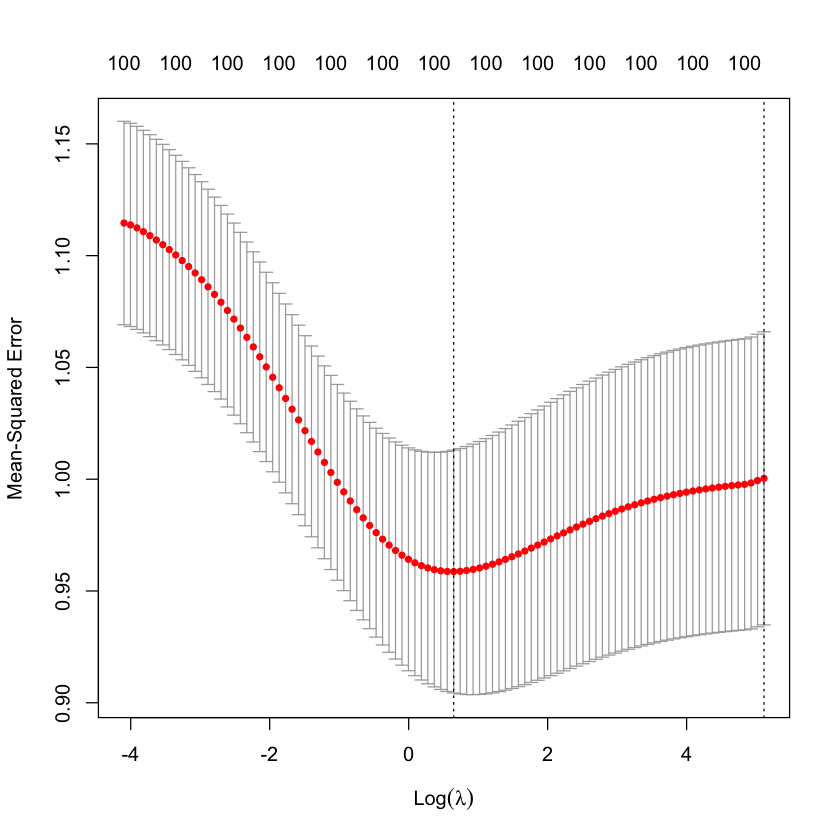

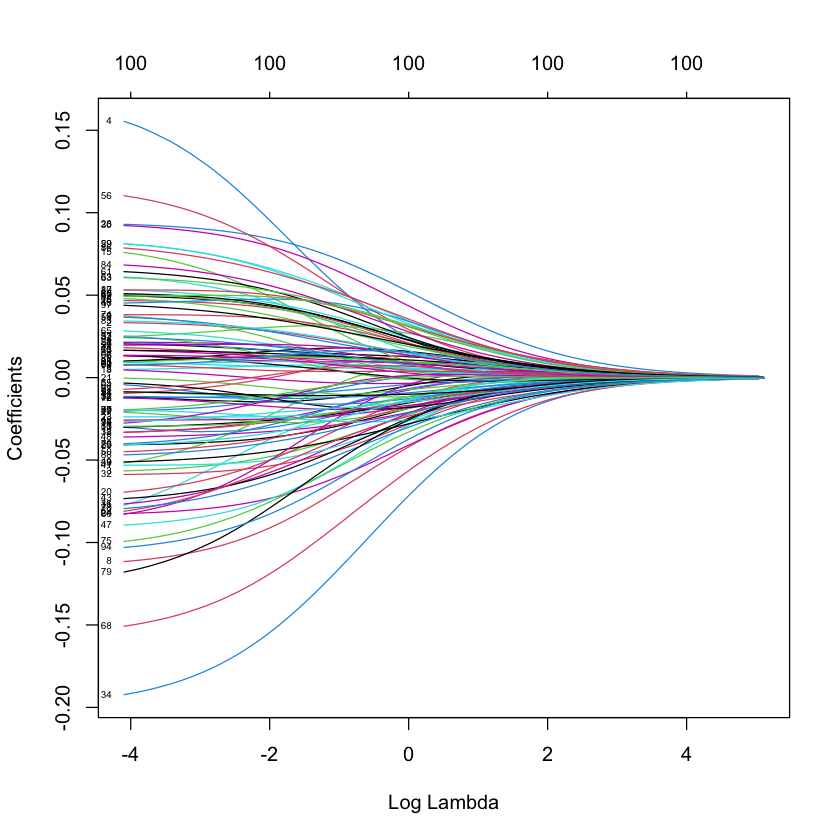

In [24]:
#perform k-fold cross-validation to find optimal lambda value
set.seed(3)
risol <- cv.glmnet(x,y,alpha=0)
#find optimal lambda value that minimizes test MSE
best_lambda <- risol$lambda.min
best_lambda
#produce plot of test MSE by lambda value
plot(risol)
#produce Ridge trace plot
plot(risol1, xvar = "lambda", label=TRUE)

In [25]:
#find coefficients of best model
best_model <- glmnet(x, y, alpha = 0, lambda = best_lambda)
coef(best_model)

101 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)           2.133020e-15
SCN3A                 1.268004e-02
SCN3B                 1.082808e-02
TMPRSS11E.....LOC653 -1.437176e-02
RPLP2                 1.203527e-02
GFER                  4.545718e-03
RBM35A                8.119677e-03
RBM35B                1.082094e-02
BTBD1                -2.822680e-02
BTBD2                 2.158646e-03
RPLP0                -9.513323e-03
RPLP1                -7.513359e-03
BTBD3                -2.928192e-03
FLJ10081             -1.059875e-02
ACAA2                 1.242838e-02
TMEFF1                3.858797e-03
SCN2B                -1.649211e-03
TFPT                  1.636394e-02
UGCG                 -2.845723e-03
BTBD7                 1.502239e-02
BTBD5                -5.590575e-03
JTV1                 -1.008629e-02
GEM                   6.856134e-03
BTBD9                -8.455829e-03
FAM45B.....FAM45A    -2.869076e-02
TAGLN                -1.199968e-02
HSD11B1     

# SVM 

randomly divide the 641 tumor samples into 2 parts (with ratio is 5:1) as training data and testing data respectively.

In [26]:
#data 
n=nrow(data)
# n=641
set.seed(12)
trainindex <- sample(1:n,0.83*n)
trainset1 <- data[trainindex,c(-1,-102)]
testset1 <- data[-trainindex,c(-1,-102)]

train_x1 = trainset1[,1:100]
train_y1 = trainset1[,101]

test_x1 = testset1[,1:100]
test_y1 = testset1[,101]
trainset1

SCN3A       SCN3B         TMPRSS11E.....LOC653 RPLP2       GFER        
450 -0.64007104 -1.0598760290 -0.78911008          -0.6408697  -0.155255260
346  0.34910815  0.7559937489  1.59893213          -0.2930668   0.747071757
336 -0.83309235  0.1419794188  0.16985738          -0.4039418  -2.417939425
247 -0.87688593  0.4951294173 -0.22936761           0.4592823  -0.006667826
174 -0.68705942  0.7758457793  1.17621261          -2.3341182  -1.284266029
453  0.03040227 -1.2158169252  0.99746276          -1.0741557   0.371213019
69  -0.91141701 -0.9222637868 -0.92293135           0.3404585   0.426591193
476 -0.64942707  0.0428959397 -0.80939966           1.2186635   0.446627874
546 -1.41824167 -0.1672556728  0.28801744          -0.1607709  -0.284193060
136  2.38595947 -0.7577151322 -0.22936761          -0.6679494  -1.141477301
91  -0.58552668 -0.6524427960  0.74393822          -0.3584882  -0.875464651
82  -1.03336546 -0.8537606795 -1.42002246           0.5957990  -1.224520515
381  1.59669279  1.2772441376  0.87008758           1.9820655  -0.645640732
121 -1.00635063 -0.6029236897  0.81771477           0.9320719  -0.024030455
294  0.46306244  0.0100790967  0.16339542          -0.3493005   1.431526021
620 -0.44215119  0.9289168747 -0.68621097           0.5644617  -1.960845044
618 -0.91956635  0.7305058877  0.20505629           1.1119133   0.663238144
218 -0.52962349 -0.0008569853 -0.63260589          -0.3799846  -0.964628693
432 -1.34137649 -1.8167373335 -1.88855099          -0.6741790  -1.424639188
269  0.83281117  0.8321904785 -0.54096192           0.3274136   0.230856046
440 -1.43216328 -1.0279801261  0.72771577          -0.5384206   0.361395534
152 -1.29948643 -0.9701247048  0.47806310           0.8083910   0.093721235
313 -1.17606504  0.2126951638  0.49467341          -0.7900721  -0.215017887
72   1.99342386  1.7118444445 -1.25703260          -0.4077305  -0.980655686
127 -0.84697015 -1.0225206230  0.13236782          -0.7942728   1.021964818
427 -0.41895805  0.5503764009 -0.55507601           1.6416146   0.976564271
637  2.09860643  2.6350984218  0.02374806           0.9962895  -0.725385595
509  2.94050660  1.1797652865  1.19907286          -1.5137017  -0.349305635
103  0.44764016 -0.6919947906  1.66313678           0.6556680   1.897686309
542  0.28689025  1.0959762595 -0.98484591          -0.4942461  -0.514226446
⋮   ⋮           ⋮             ⋮                    ⋮           ⋮           
430  0.17770218 -0.80390814    1.28912367          -0.63525977 -0.47805430 
331 -1.13896488 -0.89383862   -1.37166177          -0.83531820  0.61527449 
401 -0.52156333 -0.07820281    2.72686111          -1.04849641  0.72175842 
175 -0.95201357 -0.90249116    0.72878512          -0.09682220  0.86036082 
38   2.07044086  2.12306835   -0.38097252           0.46464196 -0.32461446 
634  1.05831553  2.92500855    0.95710421          -0.90196016 -1.21794367 
50   0.99061950  3.00862212    0.54326720           1.50079965  0.24306168 
83  -0.07176897 -1.07878714   -0.85120868          -2.03837270 -0.10539142 
53   2.47441442  1.33482784    0.55999907          -0.42115583 -0.27498378 
483  0.25140648  0.44087485   -2.05702153          -0.66851539 -0.37732826 
498  1.03846820 -1.62594271   -1.27103341          -0.12705839  1.14081472 
287 -1.26403121 -0.18498732    0.89853813           1.05950481  0.44142779 
276 -0.14706803 -0.95303263    0.68814517          -0.86397507 -0.30138237 
51   2.10748188  2.53643068   -0.55090915          -0.51753272 -1.95411086 
475 -1.10207294 -1.46653289   -1.01421899          -0.34337299  0.45196969 
523  1.71042571  3.11312626   -0.48446121           1.67905714  1.04328394 
499  0.58695382  0.66904811   -1.10828647           0.88908071  0.78936157 
630  0.26768415  2.44818774    0.88767026           0.57475275  1.32146344 
209 -1.33891202  0.09907423    0.89308578          -0.89090984  0.28446906 
491  0.77905338  0.43687455   -0.51984053          -1.37996125  0.29958945 
23  -0.80617986 -0.16049317   -0.76705019          -

Type 'citation("pROC")' for a citation.


载入程辑包：‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




[1] "accuracy : 0.614678899082569"

       Predict(radial)
truth  0  1
    0 49  8
    1 34 18

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "accuracy : 0.568807339449541"

       Predict(linear)
truth  0  1
    0 40 17
    1 30 22

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "accuracy : 0.623853211009174"

       Predict(sigmoid)
truth  0  1
    0 45 12
    1 29 23

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "accuracy : 0.605504587155963"

       Predict(polynomial)
truth  0  1
    0 42 15
    1 28 24

Setting levels: control = 0, case = 1

Setting direction: controls < cases



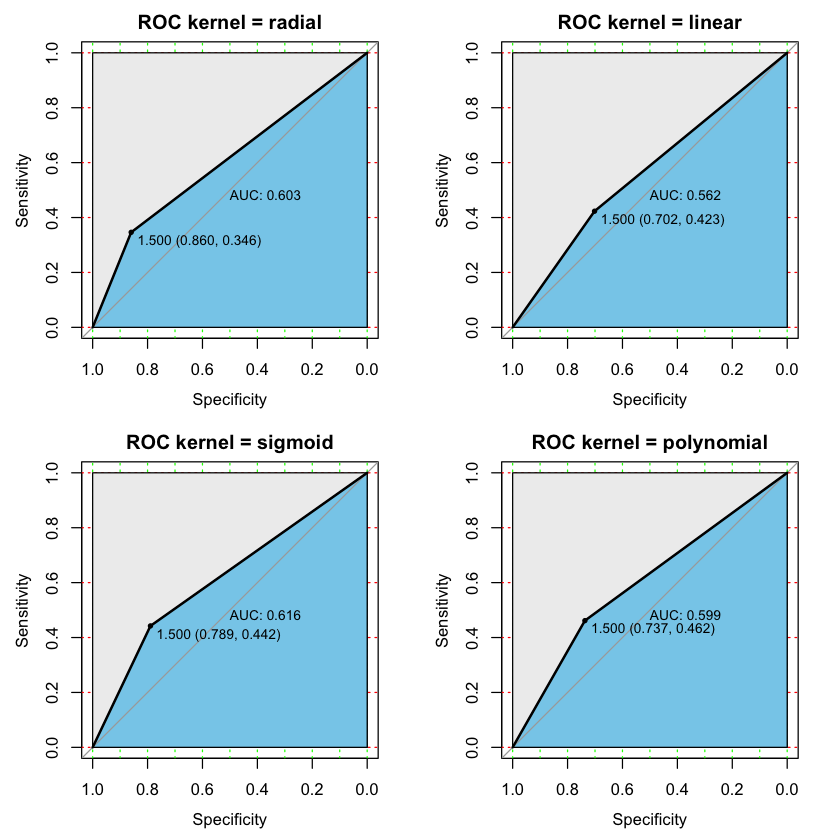

In [27]:
library(e1071)
library(pROC)

#radial
svm1 = svm(target ~.,data = trainset1,kernel = "radial",type = 'C',cost = 1,gamma = 1/ncol(trainset1))
#predict radial
pre_svm1 <- predict(svm1,newdata = test_x1,decision.values=TRUE)
paste("accuracy :" , sum(pre_svm1  == test_y1)/length(pre_svm1))
obs_p_svm1 = data.frame(prob=pre_svm1,obs=testset1$target)
table(testset1$target,pre_svm1,dnn=c("truth","  Predict(radial)"))
#ROC
svm_roc1 <- roc(testset1$target,as.numeric(pre_svm1))
par(mfrow=c(2,2)) 
plot(svm_roc1, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),grid.col=c("green", "red"), max.auc.polygon=TRUE,auc.polygon.col="skyblue", print.thres=TRUE,main='ROC kernel = radial')

#linear
svm2 = svm(target ~.,data = trainset1,kernel = "linear",type = 'C')
#predict linear
pre_svm2 <- predict(svm2,newdata = test_x1,decision.values=TRUE)
paste("accuracy :" , sum(pre_svm2  == test_y1)/length(pre_svm2))
obs_p_svm2 = data.frame(prob=pre_svm2,obs=testset1$target)
table(testset1$target,pre_svm2,dnn=c("truth","  Predict(linear)"))
#ROC
svm_roc2 <- roc(testset1$target,as.numeric(pre_svm2))
plot(svm_roc2, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),grid.col=c("green", "red"), max.auc.polygon=TRUE,auc.polygon.col="skyblue", print.thres=TRUE,main='ROC kernel = linear')

#sigmoid
svm3 = svm(target ~.,data = trainset1,kernel = "sigmoid",type = 'C',coef0=1)
#predict linear
pre_svm3 <- predict(svm3,newdata = test_x1,decision.values=TRUE)
paste("accuracy :" , sum(pre_svm3  == test_y1)/length(pre_svm3))
obs_p_svm3 = data.frame(prob=pre_svm3,obs=testset1$target)
table(testset1$target,pre_svm3,dnn=c("truth","  Predict(sigmoid)"))
#ROC
svm_roc3 <- roc(testset1$target,as.numeric(pre_svm3))
plot(svm_roc3, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),grid.col=c("green", "red"), max.auc.polygon=TRUE,auc.polygon.col="skyblue", print.thres=TRUE,main='ROC kernel = sigmoid')

#polynomial
svm4 = svm(target ~.,data = trainset1,kernel = "polynomial",type = 'C',coef0=1,degree=2)
#predict linear
pre_svm4 <- predict(svm4,newdata = test_x1,decision.values=TRUE) 
paste("accuracy :" , sum(pre_svm4  == test_y1)/length(pre_svm4))
obs_p_svm4 = data.frame(prob=pre_svm4,obs=testset1$target)
table(testset1$target,pre_svm4,dnn=c("truth","  Predict(polynomial)"))
#ROC
svm_roc4 <- roc(testset1$target,as.numeric(pre_svm4))
plot(svm_roc4, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),grid.col=c("green", "red"), max.auc.polygon=TRUE,auc.polygon.col="skyblue", print.thres=TRUE,main='ROC kernel = polynomial')



### gamma and C parameters

For linear kernels, we only need to optimize the c parameter. However, if the RBF kernel function is to be used, both the c parameter and the gamma parameter need to be optimized simultaneously. If gamma is large, the effect of c is negligible. If gamma is small, c affects the model as it does a linear model. Typical values of c and gamma are as follows. However, depending on the application, there may be specific optimum values:

0.0001 < gamma < 10

0.1 < c < 100

In [28]:
tune.svm(train_x1,train_y1,gamma = 2^(-6:-1), cost = 2^(-2:4))


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
   gamma cost
 0.03125    1

- best performance: 0.2442683 


In [7]:
tune.svm(train_x1,train_y1,coef0=0:4)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 coef0
     0

- best performance: 0.2627293 


In [8]:
tune.svm(train_x1,train_y1,degree=1:4)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 degree
      1

- best performance: 0.2596996 


In [14]:
#radial with best parameters
svm5 = svm(target ~.,data = trainset1,kernel = "radial",type = 'C',cost = 1,gamma = 0.03)
#predict radial
pre_svm5 <- predict(svm5,newdata = test_x1,decision.values=TRUE)
paste("accuracy :" , sum(pre_svm5  == test_y1)/length(pre_svm5))
obs_p_svm5 = data.frame(prob=pre_svm5,obs=testset1$target)
table(testset1$target,pre_svm5,dnn=c("truth","  Predict(radial)"))


[1] "accuracy : 0.541284403669725"

       Predict(radial)
truth  0  1
    0 55  2
    1 48  4

# Logistic Regression

[1] "accuracy : 0.596330275229358"

       Predict(logit)
truth FALSE TRUE
    0    40   17
    1    27   25

Setting levels: control = 0, case = 1

Setting direction: controls < cases



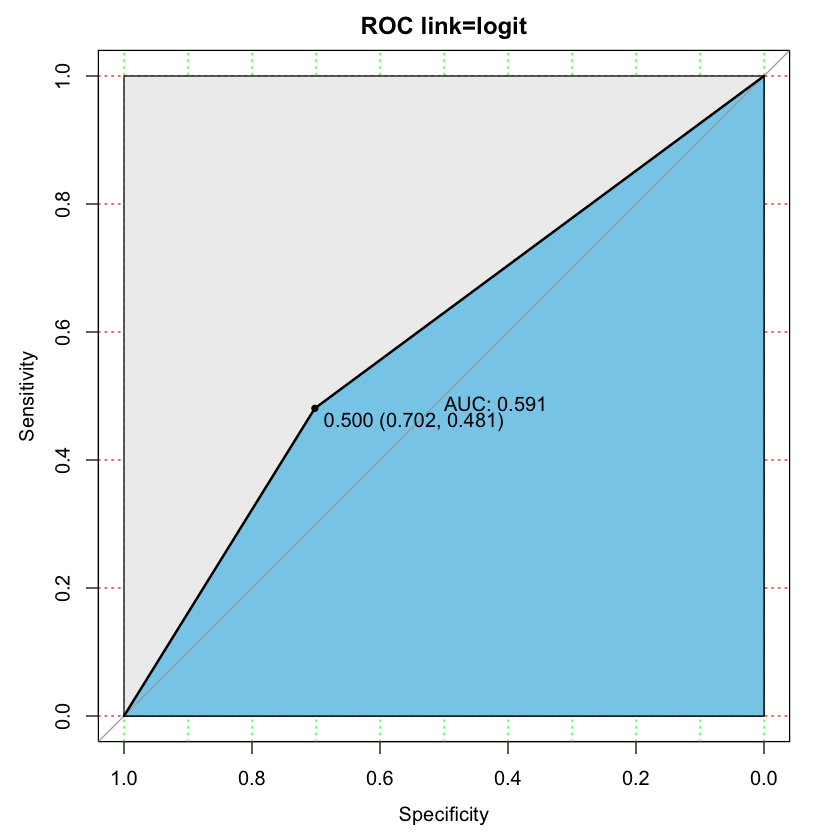

In [42]:
# train the model
# The algorithm does not converge, you can increase the number of iterations through control=list(maxit=100)
log1 <- glm(formula = target~.,family=binomial(link='logit'),data = trainset1,control = list(maxit=1000))

# predict the model on the unseen data;
predict_y1 <- predict.glm(log1,newdata = test_x1,type='response')
# Thus for a default binomial model the default predictions are of log-odds (probabilities on logit scale) 
# and type = "response" gives the predicted probabilities. 
# if the prediction > 0.5, it is 1 class(0), if < 0.5 , it is in the 2 class(1).

predict_y1 = predict_y1 > 0.5
paste("accuracy :" , sum(predict_y1  == test_y1)/length(predict_y1))
obs_p_log1 = data.frame(prob=predict_y1,obs=testset1$target)
table(testset1$target,predict_y1,dnn=c("truth","  Predict(logit)"))

#ROC
log_roc1 <- roc(testset1$target,as.numeric(predict_y1))
plot(log_roc1, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),grid.col=c("green", "red"), max.auc.polygon=TRUE,auc.polygon.col="skyblue", print.thres=TRUE,main='ROC link=logit')


# TOP 10 genes

In [16]:
top_10

[1] "HSD11B2"            "RBM4.....LOC650029" "MGRN1"             
 [4] "ANP32B"             "BTBD1"              "FAM45B.....FAM45A" 
 [7] "SCN1A"              "ATRN"               "GNGT1"             
[10] "PTOV1"

In [48]:
gene_data <- data[,which(names(data)%in%c(top_10))]
genedata <- cbind(gene_data,data2[,2:3])
genedata

BTBD1        FAM45B.....FAM45A HSD11B2     SCN1A        RBM4.....LOC650029
1    0.877521422  1.11742318       -0.39855002  0.410659517  0.19946135       
2    0.663818544  0.83919257       -0.73568529 -0.140718930  2.04082047       
3    0.218431140  0.86090364       -0.38576185  0.514274517  0.15201937       
4    1.653555524 -0.91299217        1.35914516  0.295640864  0.27917070       
5    1.274633648  0.39112393       -0.59165515  3.008305527  0.63792969       
6   -0.092718070  1.22660229        1.22730681  1.123070197  1.45670541       
7   -1.618881971 -1.97508592        1.34038940  1.004398621 -1.39830352       
8   -0.240980162 -0.59455111       -0.68523431 -1.987124060  0.52198349       
9   -1.044483368  0.50482583        0.52126782  0.125653547  0.50551257       
10   0.369241992  0.04512547       -0.92614975  0.639414397 -1.54203470       
11  -1.891594316  1.53265178        2.22289022 -0.006474539  1.23490866       
12  -0.304271070 -1.26723996        0.56247374  1.199691805  1.33122787       
13  -0.008239982  1.75127021       -0.45403341  0.462046632  1.50140704       
14  -0.632255281  0.18210803        0.72138882  0.370554187  0.16548538       
15   0.202167769  0.19708376       -0.65978989  0.608306783 -0.49387445       
16   0.329741696  0.79871787       -1.29562723 -0.335831925 -1.84813964       
17   0.574828557  1.03349350        0.31305515  0.411921166 -0.22621423       
18  -0.173140416 -0.87709486        2.48965628 -0.675688240  0.20620157       
19   0.542931336 -1.19722648        0.57942376 -1.890886657 -0.06655592       
20   1.040900976 -1.09246288        0.83415069 -1.696043186 -1.05278852       
21   0.565755054 -0.92206362        0.94944858  0.310039518  1.53330544       
22  -0.031149681 -0.66570620        0.07124053  0.241608046 -0.40870487       
23  -0.759418131 -0.20556402        0.49291103  0.392789712  0.06070061       
24   0.857767122 -0.23127233        1.10205528  0.456240309  1.07822000       
25   0.477894940 -0.83307287        2.02093782  1.004398621  0.33733052       
26   0.573696599  1.28218911        0.64228427  0.233131983  0.64044392       
27  -0.417297082 -1.06604842       -0.45267007  0.702543519 -0.98886189       
28  -0.728917708 -0.86821600        0.43379161 -1.032523597  1.11608389       
29   0.549520798  0.90801873       -0.67139715 -1.331815903 -0.35259263       
30  -2.252009620 -0.54842496        0.32753451 -1.062370604 -0.17866867       
⋮   ⋮            ⋮                 ⋮           ⋮            ⋮                 
612  1.64763387  -1.858078214      -1.1338736   0.74005173  -0.74922006       
613 -0.79029052  -0.129520475       1.2891600  -0.28345808   1.15324956       
614  0.03696666  -0.264468403      -1.1673650   0.34633499  -0.72958081       
615  1.04090098   0.536355815      -1.4313334  -0.05400216  -1.90646549       
616  0.89354366  -0.510748861      -0.6526456   0.90696788  -0.40011485       
617 -0.93830949  -0.191258967      -0.1382329  -0.82741399   1.55067906       
618 -1.53413751   0.066372795      -0.4075001   0.92740136   0.57482464       
619 -0.72737169   1.324004646      -0.2273997   0.45090115   0.52255661       
620  0.67690128   0.747135129      -0.6214929   1.48270316   1.23044124       
621  0.82394982   1.554852053      -0.2110491   1.32565356   0.61255567       
622  0.61080081  -0.008621652      -0.2154438   0.89305734   0.11713096       
623 -1.47239043   1.546656969       0.0336476   0.58923587   0.14487629       
624 -0.58169574   0.224565669       0.8608638   1.50296844  -0.67157071       
625 -0.14891531   0.893305645      -0.6276146   0.25849868   0.85486100       
626  0.90007146   0.744868783      -0.5035114   0.89039191   0.07966784       
627 -0.46978782   0.714140880       0.7223006   0.38240094   0.36906720       
628  0.51526100   0.912297303       1.1085427   2.61270766  -0.34918447       
629  0.66917913  -0.007483559      -0.3977536   0.82430909  -0.48983349       
630 -0.38236995  -0.394554128      -0.8710727  -0.6756

find correlation between 10 genes, IC50 and target class.

corrplot 0.92 loaded



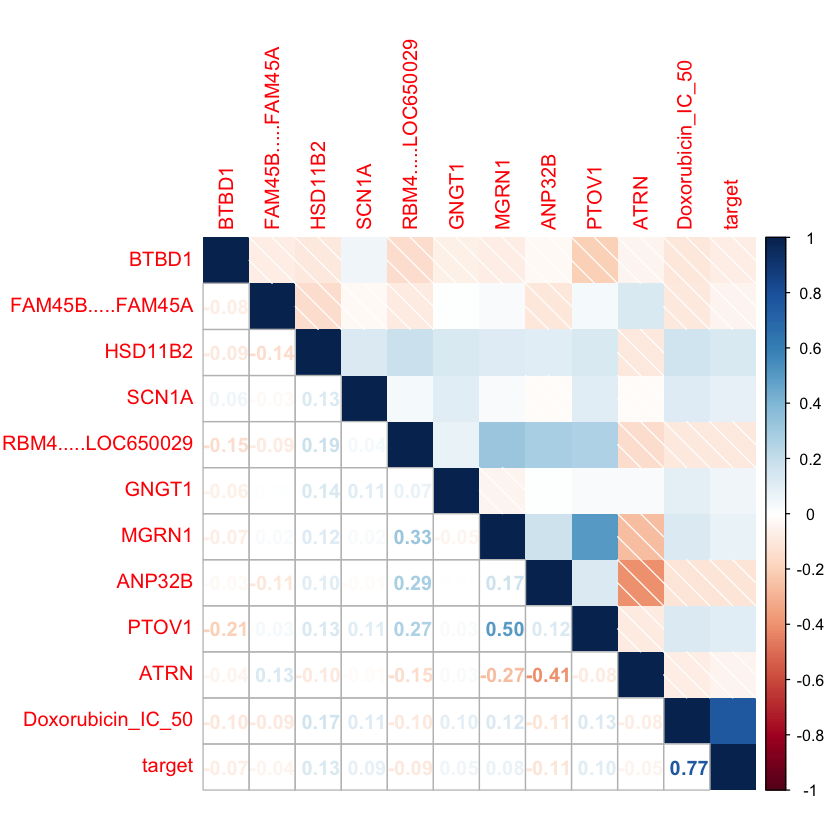

In [49]:
library("corrplot")
options(digits = 2)
corrplot(cor(genedata), method = "shade",type = "upper", tl.pos = "lt")
corrplot(cor(genedata),add = TRUE, type = "lower", method = "number", diag = FALSE, tl.pos = "n", cl.pos="n")

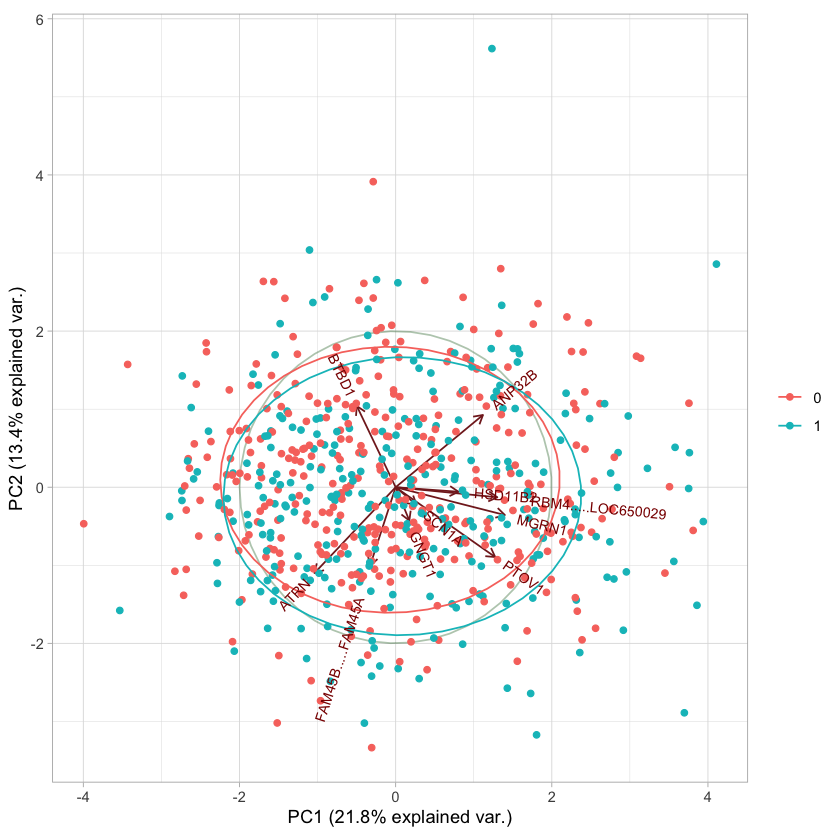

In [52]:
# review PCA: use pca to reduce the dimension of the data and visualize it;
library(ggbiplot)
gene.pca<- prcomp(genedata[,1:10], scale. =TRUE)
ggbiplot(gene.pca, obs.scale = 1, var.scale = 1,
    groups = factor(genedata$target), ellipse = TRUE, circle = TRUE) +
    scale_color_discrete(name = '') +theme_light()

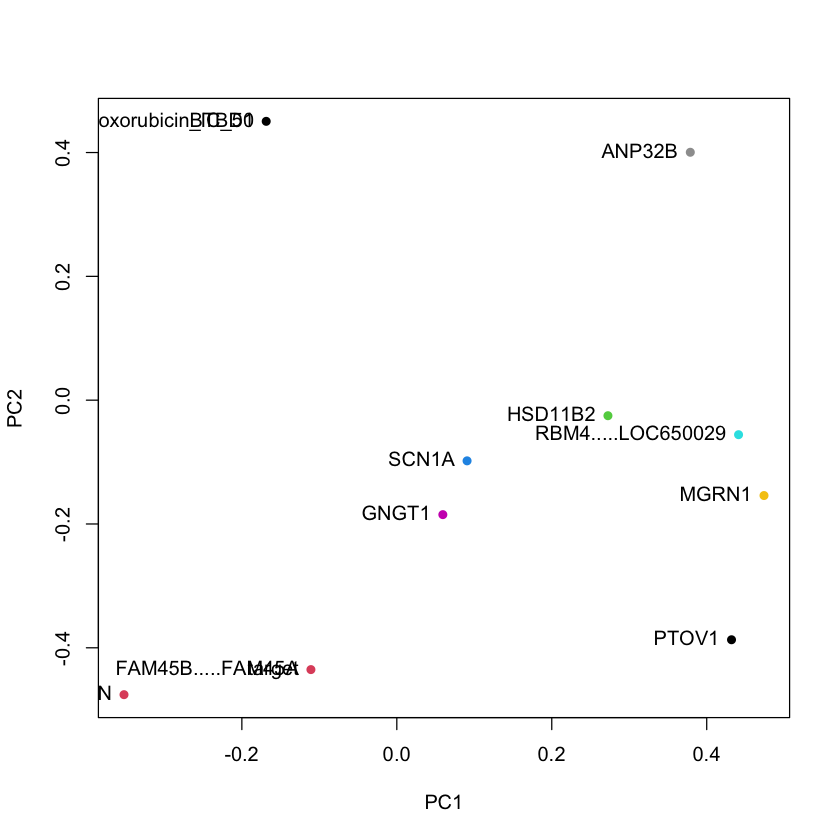

In [53]:
plot(gene.pca$rotation,col=rep(1:10),pch=16)
text(gene.pca$rotation,colnames(genedata),pos=2)

In [54]:
genex <- genedata[,1:10]
y<-genedata[,11]
lm.genedata=lm(y~.,data=genex)
summ <- summary(lm.genedata)
summ


Call:
lm(formula = y ~ ., data = genex)

Residuals:
   Min     1Q Median     3Q    Max 
-2.377 -0.662 -0.054  0.457  3.556 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.17e-15   3.71e-02    0.00  1.00000    
BTBD1              -1.09e-01   3.88e-02   -2.82  0.00496 ** 
FAM45B.....FAM45A  -1.04e-01   3.83e-02   -2.73  0.00659 ** 
HSD11B2             1.35e-01   3.91e-02    3.46  0.00057 ***
SCN1A               7.97e-02   3.81e-02    2.09  0.03667 *  
RBM4.....LOC650029 -1.85e-01   4.17e-02   -4.45    1e-05 ***
GNGT1               8.27e-02   3.80e-02    2.18  0.02969 *  
MGRN1               1.18e-01   4.59e-02    2.58  0.01018 *  
ANP32B             -1.61e-01   4.22e-02   -3.82  0.00015 ***
PTOV1               8.01e-02   4.46e-02    1.79  0.07317 .  
ATRN               -1.12e-01   4.23e-02   -2.65  0.00831 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.94 on 630 degrees of freedom
Mult

In [55]:
ols_step_forward_p(lm.genedata,0.01)


                                 Selection Summary                                   
------------------------------------------------------------------------------------
        Variable                            Adj.                                        
Step         Entered          R-Square    R-Square     C(p)         AIC        RMSE     
------------------------------------------------------------------------------------
   1    HSD11B2                 0.0277      0.0262    66.4114    1806.0768    0.9868    
   2    RBM4.....LOC650029      0.0443      0.0413    56.3800    1797.0181    0.9791    
   3    MGRN1                   0.0664      0.0620    42.4370    1784.0637    0.9685    
   4    ANP32B                  0.0784      0.0727    35.6935    1777.7119    0.9630    
   5    BTBD1                   0.0887      0.0815    30.2695    1772.5339    0.9584    
   6    FAM45B.....FAM45A       0.1004      0.0919    23.7867    1766.2327    0.9529    
-------------------------------

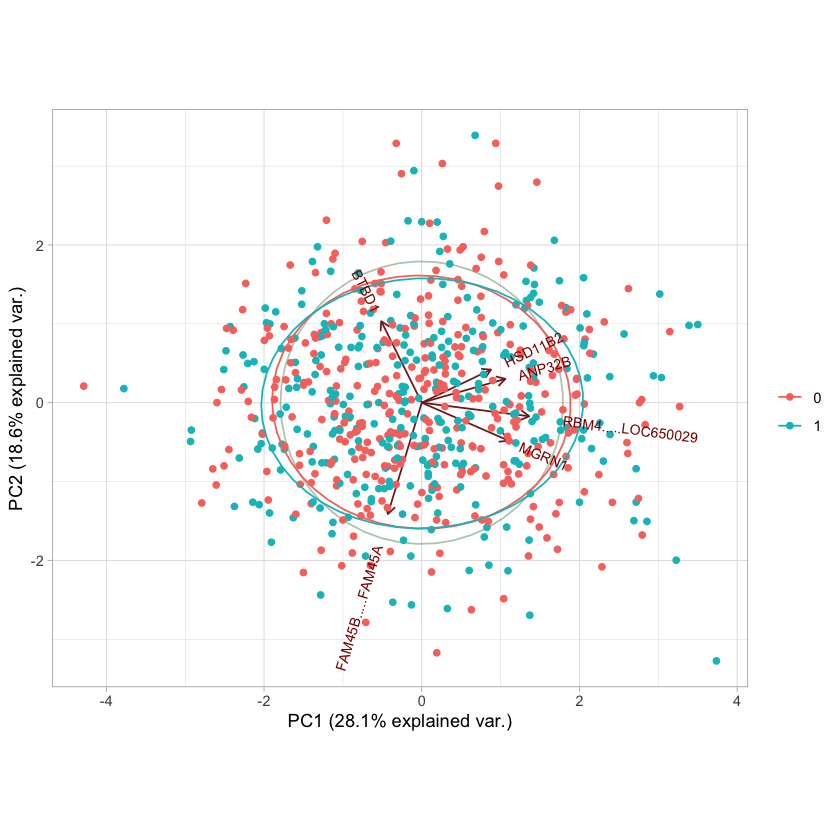

In [56]:
gene1.pca<- prcomp(genedata[,c(1,2,3,5,7,8)], scale. =TRUE)
ggbiplot(gene1.pca, obs.scale = 1, var.scale = 1,
    groups = factor(genedata$target), ellipse = TRUE, circle = TRUE) +
    scale_color_discrete(name = '') +theme_light()

In [57]:
genex1 <- genedata[,1:10]
x2 = data.frame(X7X9=genedata[,7]*genedata[,9],X8X10=genedata[,8]*genedata[,10])
X = cbind(genex1,x2)
y<-genedata[,11]
lm.genedata1=lm(y~.,data=X)
summ1 <- summary(lm.genedata1)
summ1


Call:
lm(formula = y ~ ., data = X)

Residuals:
   Min     1Q Median     3Q    Max 
-2.249 -0.645 -0.067  0.466  3.580 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.0251     0.0443    0.57  0.57084    
BTBD1               -0.1113     0.0389   -2.86  0.00431 ** 
FAM45B.....FAM45A   -0.1070     0.0385   -2.78  0.00557 ** 
HSD11B2              0.1453     0.0394    3.69  0.00025 ***
SCN1A                0.0774     0.0380    2.04  0.04213 *  
RBM4.....LOC650029  -0.1752     0.0419   -4.18  3.3e-05 ***
GNGT1                0.0892     0.0381    2.34  0.01940 *  
MGRN1                0.1297     0.0462    2.81  0.00512 ** 
ANP32B              -0.1643     0.0421   -3.90  0.00011 ***
PTOV1                0.0722     0.0447    1.61  0.10699    
ATRN                -0.1038     0.0431   -2.41  0.01628 *  
X7X9                -0.0729     0.0390   -1.87  0.06193 .  
X8X10               -0.0279     0.0337   -0.83  0.40746    
---
Signif. codes:  0 ‘*

In [58]:
ols_step_forward_p(lm.genedata1,0.05)


                                 Selection Summary                                   
------------------------------------------------------------------------------------
        Variable                            Adj.                                        
Step         Entered          R-Square    R-Square     C(p)         AIC        RMSE     
------------------------------------------------------------------------------------
   1    HSD11B2                 0.0277      0.0262    68.9633    1806.0768    0.9868    
   2    RBM4.....LOC650029      0.0443      0.0413    58.8883    1797.0181    0.9791    
   3    MGRN1                   0.0664      0.0620    44.8874    1784.0637    0.9685    
   4    ANP32B                  0.0784      0.0727    38.1122    1777.7119    0.9630    
   5    BTBD1                   0.0887      0.0815    32.6612    1772.5339    0.9584    
   6    FAM45B.....FAM45A       0.1004      0.0919    26.1477    1766.2327    0.9529    
   7    SCN1A                  

## SVM(top 10 genes)

In [59]:
#data 
n=nrow(genedata)
# n=641
set.seed(2)
trainindex <- sample(1:n,0.83*n)
trainset2 <- genedata[trainindex,c(-11)]
testset2 <- genedata[-trainindex,c(-11)]

train_x2 = trainset2[,1:10]
train_y2 = trainset2[,11]

test_x2 = testset2[,1:10]
test_y2 = testset2[,11]
trainset2

BTBD1  FAM45B.....FAM45A HSD11B2 SCN1A  RBM4.....LOC650029 GNGT1  MGRN1 
416 -0.58   1.2853           -0.541   0.389  0.906              1.314  0.587
392  0.84   0.5900           -0.067   1.555  1.952              0.041  0.451
273 -3.71   0.7100            0.092  -0.873  1.158              0.022 -0.656
349 -1.11   1.3074            0.684  -0.489  1.057             -0.967  1.633
204 -2.31   0.0205            0.818   0.842 -0.769              0.441 -1.174
381 -0.30  -1.2565           -0.818   0.986  0.598             -1.250 -0.280
297  1.28   0.4118            0.966   0.294 -1.660              0.191  0.777
587  0.57  -1.2976            1.222   0.901  0.011              2.069 -0.647
502 -0.17  -1.7338           -0.520  -2.350  1.742             -0.710  1.693
464  1.24   0.3960            2.504   0.194 -1.155             -0.047  0.598
480 -1.68  -0.9495           -0.530  -0.032  0.711              0.808 -0.153
371 -0.64   0.5454           -1.005  -1.135 -1.274              0.624  0.236
575 -0.28   0.3019           -0.609  -2.321 -1.075              0.119 -0.139
231  0.23  -0.7311           -1.380  -0.599 -1.845             -1.450 -0.584
289 -0.18   0.5176           -0.299  -0.049 -0.278              1.374 -1.049
566  0.88   0.3911            0.480   1.321  0.732             -0.120  0.315
624 -0.58   0.2246            0.861   1.503 -0.672             -1.419  0.080
484 -0.37  -2.0831           -0.381   1.097  1.139              0.399  1.434
550 -0.25   0.7877           -0.156  -0.885 -0.132             -0.545  0.608
622  0.61  -0.0086           -0.215   0.893  0.117             -0.588 -0.658
144  1.27   0.1667           -0.411  -0.635 -0.015              1.291 -1.658
45   0.90  -1.4930           -0.475   0.695 -1.039              0.752 -1.038
238  0.48  -0.9495           -0.156  -0.240 -0.829             -1.268  0.474
9   -1.04   0.5048            0.521   0.126  0.506              1.314  1.280
375 -1.13   0.3144            1.338   0.450  1.583             -0.651 -0.440
456 -0.40  -0.6819           -0.440  -0.332  2.652             -0.574  0.847
429  0.91  -0.7645           -0.169   0.408 -0.799              0.307 -0.049
390  0.36  -0.9403            2.140   1.734 -1.178              2.524  1.118
350 -2.91  -0.1483            1.409   0.720  0.018             -1.018  0.865
130  2.05   0.1333            1.367  -0.821 -1.411             -0.619 -0.488
⋮   ⋮      ⋮                 ⋮       ⋮      ⋮                  ⋮      ⋮     
211 -0.488 -0.389             1.046   0.853 -1.106              1.64  -2.158
3    0.218  0.861            -0.386   0.514  0.152              0.31  -0.710
10   0.369  0.045            -0.926   0.639 -1.542             -0.29  -0.473
84  -0.608  1.500             1.214   0.296 -0.263             -1.12   1.097
628  0.515  0.912             1.109   2.613 -0.349             -1.46  -0.458
498 -0.783  2.026            -0.307  -0.942 -1.132             -0.29   0.167
455 -1.324 -1.505            -0.084  -1.556  1.167             -0.77   0.682
310  1.309 -0.258            -0.592   0.372 -0.672             -0.71  -0.670
561 -1.212  0.983            -1.088   0.406 -2.241             -0.69   0.341
35  -1.649 -0.681             1.845   1.560  0.616              2.19   0.901
474 -0.036  0.603            -0.393  -1.048 -0.509             -0.13  -1.270
602  0.124  1.354             0.073  -2.156  0.043             -0.76  -0.511
355  1.346  1.533            -0.048   0.105  0.356              0.17   0.263
271  0.114 -0.773            -0.172  -0.891 -0.505             -0.48   0.034
351 -1.210  0.719            -1.435   0.914 -0.745             -0.78  -6.816
64   0.313 -0.634             0.276  -1.253  2.111              1.38   0.497
428 -0.584  0.210            -0.406   0.790  0.353             -1.08  -0.045
595  0.545  0.116             0.047   0.956 -3.839              0.69  -0.239
584  0.557 -0.388             1.145   0.723 -0.012              0.62  -0.241
368 -0.477 -0.511            -0.634   0.125  0.834             -0.20   0.554


[1] "accuracy : 0.642201834862385"

       Predict(radial)
truth  0  1
    0 50 18
    1 21 20

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "accuracy : 0.651376146788991"

       Predict(linear)
truth  0  1
    0 51 17
    1 21 20

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "accuracy : 0.614678899082569"

       Predict(sigmoid)
truth  0  1
    0 40 28
    1 14 27

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "accuracy : 0.660550458715596"

       Predict(polynomial)
truth  0  1
    0 52 16
    1 21 20

Setting levels: control = 0, case = 1

Setting direction: controls < cases



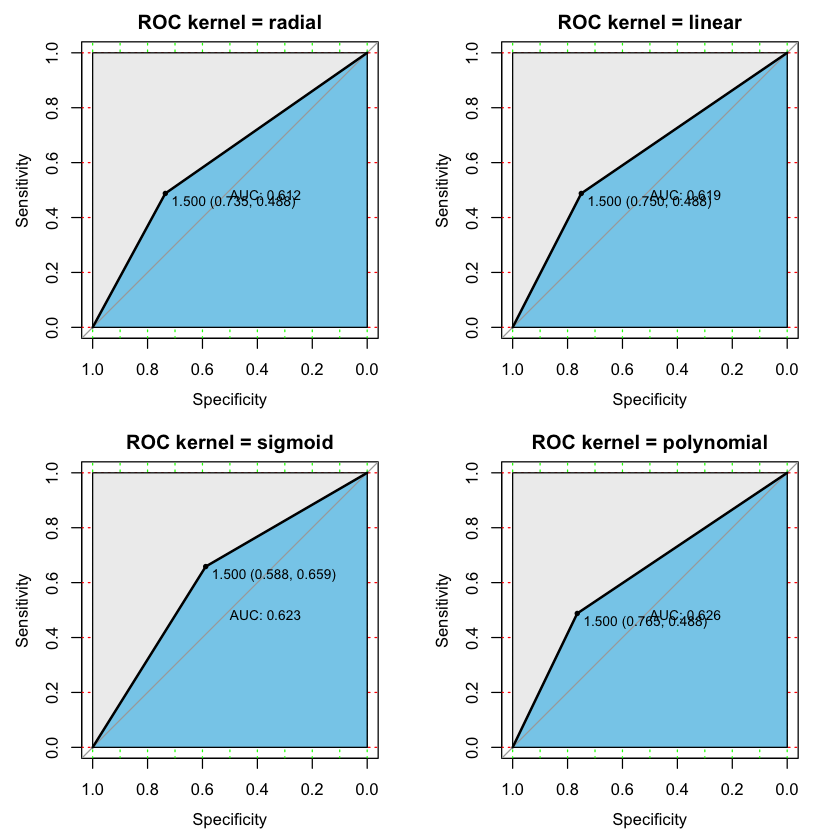

In [182]:
library(e1071)
library(pROC)

#radial
svm6 = svm(target ~.,data = trainset2,kernel = "radial",type = 'C',cost = 2,gamma = 0.01)
#predict radial
pre_svm6 <- predict(svm6,newdata = test_x2,decision.values=TRUE)
paste("accuracy :" , sum(pre_svm6  == test_y2)/length(pre_svm6))
obs_p_svm6 = data.frame(prob=pre_svm6,obs=testset2$target)
table(testset2$target,pre_svm6,dnn=c("truth","  Predict(radial)"))
#ROC
svm_roc6 <- roc(testset2$target,as.numeric(pre_svm6))
par(mfrow=c(2,2)) 
plot(svm_roc6, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),grid.col=c("green", "red"), max.auc.polygon=TRUE,auc.polygon.col="skyblue", print.thres=TRUE,main='ROC kernel = radial')

#linear
svm7 = svm(target ~.,data = trainset2,kernel = "linear",type = 'C')
#predict linear
pre_svm7 <- predict(svm7,newdata = test_x2,decision.values=TRUE)
paste("accuracy :" , sum(pre_svm7  == test_y2)/length(pre_svm7))
obs_p_svm7 = data.frame(prob=pre_svm7,obs=testset2$target)
table(testset2$target,pre_svm7,dnn=c("truth","  Predict(linear)"))
#ROC
svm_roc7 <- roc(testset2$target,as.numeric(pre_svm7))
plot(svm_roc7, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),grid.col=c("green", "red"), max.auc.polygon=TRUE,auc.polygon.col="skyblue", print.thres=TRUE,main='ROC kernel = linear')

#sigmoid
svm8 = svm(target ~.,data = trainset2,kernel = "sigmoid",type = 'C',coef0=2)
#predict linear
pre_svm8 <- predict(svm8,newdata = test_x2,decision.values=TRUE)
paste("accuracy :" , sum(pre_svm8  == test_y2)/length(pre_svm8))
obs_p_svm8 = data.frame(prob=pre_svm8,obs=testset2$target)
table(testset2$target,pre_svm8,dnn=c("truth","  Predict(sigmoid)"))
#ROC
svm_roc8 <- roc(testset2$target,as.numeric(pre_svm8))
plot(svm_roc8, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),grid.col=c("green", "red"), max.auc.polygon=TRUE,auc.polygon.col="skyblue", print.thres=TRUE,main='ROC kernel = sigmoid')

#polynomial
svm9 = svm(target ~.,data = trainset2,kernel = "polynomial",type = 'C',degree=1)
#predict linear
pre_svm9 <- predict(svm9,newdata = test_x2,decision.values=TRUE) 
paste("accuracy :" , sum(pre_svm9  == test_y2)/length(pre_svm9))
obs_p_svm9 = data.frame(prob=pre_svm9,obs=testset2$target)
table(testset2$target,pre_svm9,dnn=c("truth","  Predict(polynomial)"))
#ROC
svm_roc9 <- roc(testset2$target,as.numeric(pre_svm9))
plot(svm_roc9, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),grid.col=c("green", "red"), max.auc.polygon=TRUE,auc.polygon.col="skyblue", print.thres=TRUE,main='ROC kernel = polynomial')



In [60]:
tune.svm(train_x2,train_y2,gamma = 2^(-6:-1), cost = 2^(-2:4))


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.5    1

- best performance: 0.27 


In [61]:
#radial
svm10 = svm(target ~.,data = trainset2,kernel = "radial",type = 'C',cost = 1,gamma = 0.5)
#predict radial
pre_svm10 <- predict(svm10,newdata = test_x2,decision.values=TRUE)
paste("accuracy :" , sum(pre_svm10  == test_y2)/length(pre_svm10))
obs_p_svm10 = data.frame(prob=pre_svm10,obs=testset2$target)
table(testset2$target,pre_svm10,dnn=c("truth","  Predict(radial)"))

[1] "accuracy : 0.532110091743119"

       Predict(radial)
truth  0  1
    0 44 24
    1 27 14

## Logistic Regression(top 10 genes)

[1] "accuracy : 0.660550458715596"

       Predict(logit)
truth FALSE TRUE
    0    51   17
    1    20   21

Setting levels: control = 0, case = 1

Setting direction: controls < cases



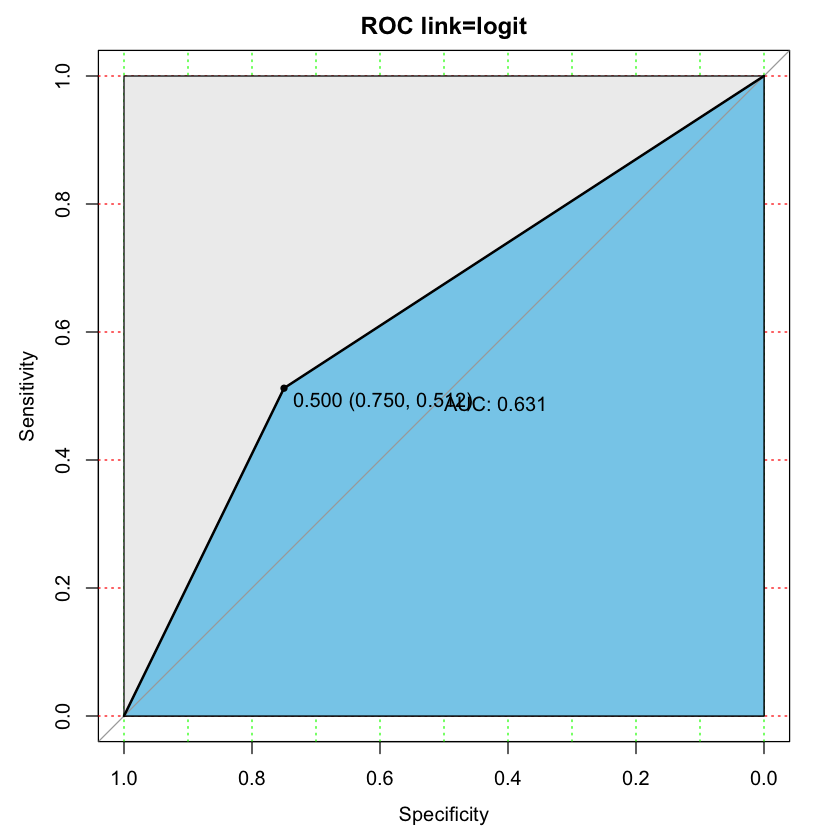

In [62]:
# train the model
# The algorithm does not converge, you can increase the number of iterations through control=list(maxit=100)
log2 <- glm(formula = target~.,family=binomial(link='logit'),data = trainset2,control = list(maxit=1000))

# predict the model on the unseen data;
predict_y2 <- predict.glm(log2,newdata = test_x2,type='response')
# Thus for a default binomial model the default predictions are of log-odds (probabilities on logit scale) 
# and type = "response" gives the predicted probabilities. 

predict_y2 = predict_y2 > 0.5
paste("accuracy :" , sum(predict_y2  == test_y2)/length(predict_y2))
obs_p_log2 = data.frame(prob=predict_y2,obs=testset2$target)
table(testset2$target,predict_y2,dnn=c("truth","  Predict(logit)"))

#ROC
log_roc2 <- roc(testset2$target,as.numeric(predict_y2))
plot(log_roc2, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),grid.col=c("green", "red"), max.auc.polygon=TRUE,auc.polygon.col="skyblue", print.thres=TRUE,main='ROC link=logit')


[1] "accuracy : 0.660550458715596"

       Predict(logit)
truth FALSE TRUE
    0    51   17
    1    20   21

Setting levels: control = 0, case = 1

Setting direction: controls < cases



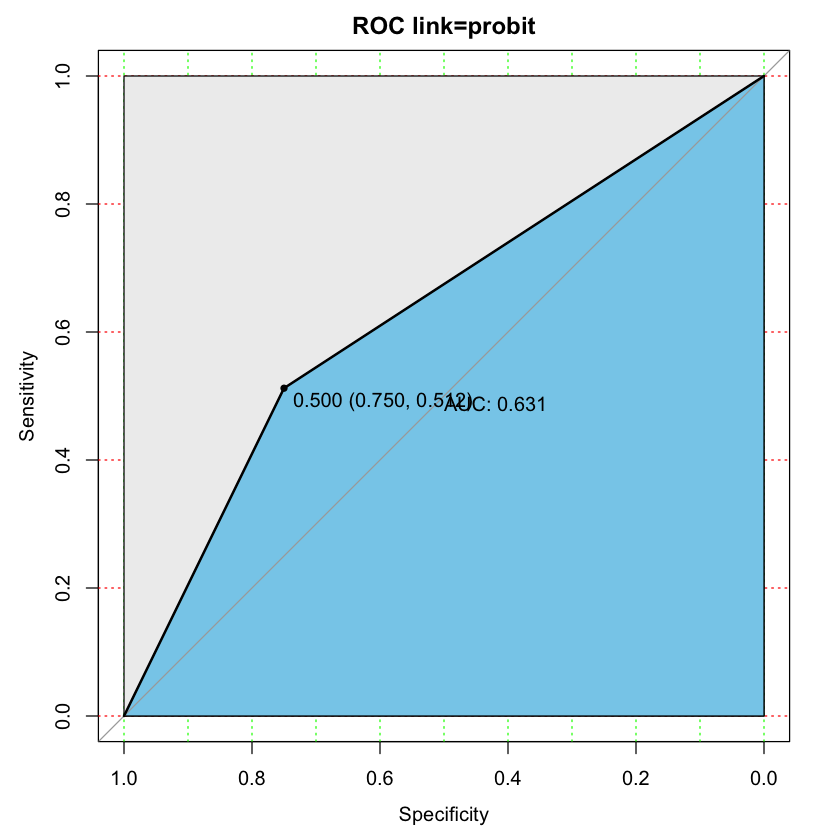

In [65]:
# train the model
# The algorithm does not converge, you can increase the number of iterations through control=list(maxit=100)
log2 <- glm(formula = target~.,family=binomial(link='probit'),data = trainset2,control = list(maxit=1000))

# predict the model on the unseen data;
predict_y2 <- predict.glm(log2,newdata = test_x2,type='response')
# Thus for a default binomial model the default predictions are of log-odds (probabilities on logit scale) 

predict_y2 = predict_y2 > 0.5
paste("accuracy :" , sum(predict_y2  == test_y2)/length(predict_y2))
obs_p_log2 = data.frame(prob=predict_y2,obs=testset2$target)
table(testset2$target,predict_y2,dnn=c("truth","  Predict(logit)"))

#ROC
log_roc2 <- roc(testset2$target,as.numeric(predict_y2))
plot(log_roc2, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),grid.col=c("green", "red"), max.auc.polygon=TRUE,auc.polygon.col="skyblue", print.thres=TRUE,main='ROC link=probit')


## Logistic Regression(top 6 genes)

[1] "accuracy : 0.63302752293578"

       Predict(logit)
truth FALSE TRUE
    0    49   19
    1    21   20

Setting levels: control = 0, case = 1

Setting direction: controls < cases



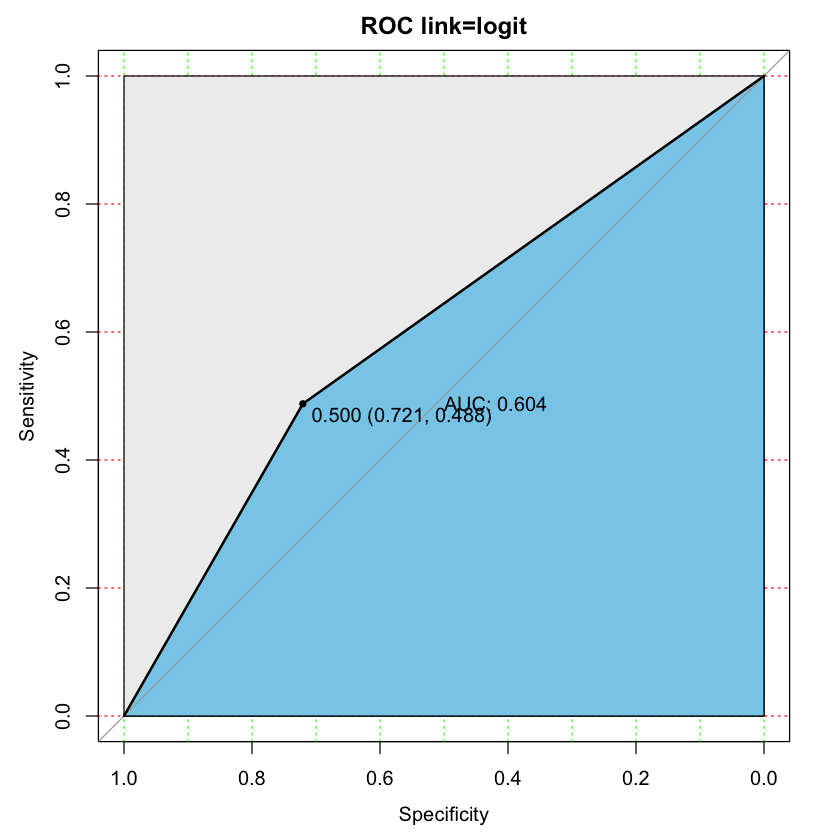

In [66]:
trainset3 <- genedata[trainindex,c(-4,-6,-9,-10,-11)]
testset3 <- genedata[-trainindex,c(-4,-6,-9,-10,-11)]

train_x3 = trainset3[,1:6]
train_y3 = trainset3[,7]

test_x3 = testset3[,1:6]
test_y3 = testset3[,7]

# train the model
# The algorithm does not converge, you can increase the number of iterations through control=list(maxit=100)
log3 <- glm(formula = target~.,family=binomial(link='logit'),data = trainset3)

# predict the model on the unseen data;
predict_y3 <- predict.glm(log3,newdata = test_x3,type='response')
# Thus for a default binomial model the default predictions are of log-odds (probabilities on logit scale) 
# and type = "response" gives the predicted probabilities. 

predict_y3 = predict_y3 > 0.5
paste("accuracy :" , sum(predict_y3  == test_y3)/length(predict_y3))
obs_p_log3 = data.frame(prob=predict_y3,obs=testset3$target)
table(testset3$target,predict_y3,dnn=c("truth","  Predict(logit)"))

#ROC
log_roc3 <- roc(testset3$target,as.numeric(predict_y3))
plot(log_roc3, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),grid.col=c("green", "red"), max.auc.polygon=TRUE,auc.polygon.col="skyblue", print.thres=TRUE,main='ROC link=logit')

